In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
plt.rcParams['figure.figsize']=[16,8]

In [3]:
df=pd.read_csv(r"C:\Users\91701\Desktop\gl\capstone datasets\3_hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df['is_canceled']=df['is_canceled'].astype(object)   

df['is_repeated_guest']=df['is_repeated_guest'].astype(object)

df['reservation_status_date']=df['reservation_status_date'].apply(pd.to_datetime)



In [5]:
df['agent']=df['agent'].astype(object)

In [6]:
df['agent']=df['agent'].astype(object)
df['arrival_date_year']=df.arrival_date_year.astype('object')
df['arrival_date_week_number']=df.arrival_date_week_number.astype('object')

df['arrival_date_day_of_month']=df.arrival_date_day_of_month.astype('object')


In [7]:
df.dtypes

hotel                                     object
is_canceled                               object
lead_time                                  int64
arrival_date_year                         object
arrival_date_month                        object
arrival_date_week_number                  object
arrival_date_day_of_month                 object
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                         object
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [8]:
duplicate_values=df[df.duplicated()]
print("There are",duplicate_values.shape[0],"Duplicated Values")
df=df.drop_duplicates()

print("Before Removing the duplicated value the length was",df.shape[0])
print("After Removing duplicated value length of our Data is",df.shape[0])


There are 31994 Duplicated Values
Before Removing the duplicated value the length was 87396
After Removing duplicated value length of our Data is 87396


In [9]:
#NULL VALUES

print(df.isnull().sum())

print()
print('*****'*50)

null_percent=(df.isnull().sum())/(len(df))*100
null_percent.sort_values(ascending=False)

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


company                           93.982562
agent                             13.951439
country                            0.517186
children                           0.004577
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

In [10]:
df.drop('company',axis=1,inplace=True) #94% Null value we cant use these column or 
#otherwise we will ask more data to the client at these situation.
df['children']=df['children'].fillna(0) 
df['country']=df['country'].fillna("Not Available")
df['agent']=df['agent'].fillna(0)

In [11]:
len(df[(df.adults==0)&(df.babies==0)&(df.children==0)])

166

In [12]:
#drop such rows

indices=df[(df.adults==0)&(df.babies==0)&(df.children==0)].index.values
df.drop(index=indices,axis=0,inplace=True)
df.shape

(87230, 31)

In [13]:
ind=df[df['adr']<0].index.values
df.drop(index=ind,axis=0,inplace=True)
df.shape

(87229, 31)

In [14]:
numerical=df.select_dtypes(np.number)
categorical=df.select_dtypes('object')
categorical.drop('reservation_status',axis=1,inplace=True)

In [15]:
numerical.columns

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [16]:
categorical.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type'],
      dtype='object')

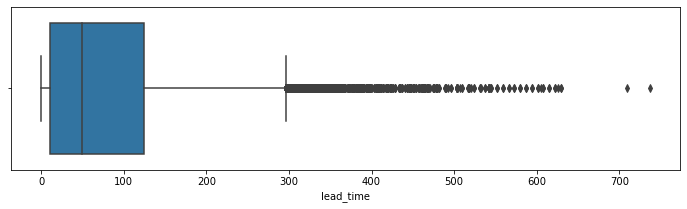

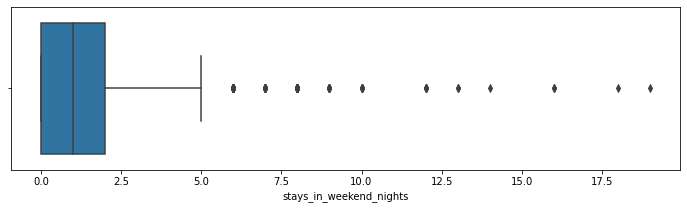

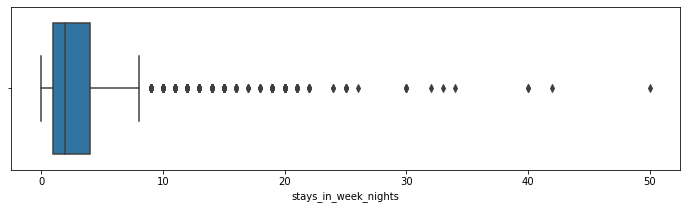

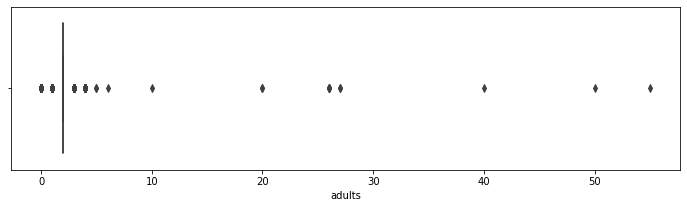

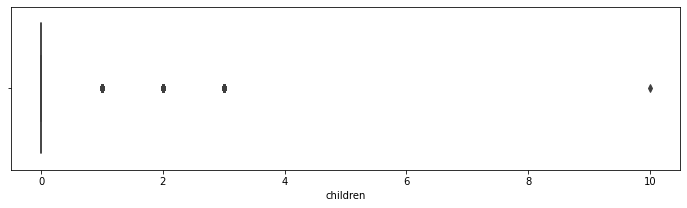

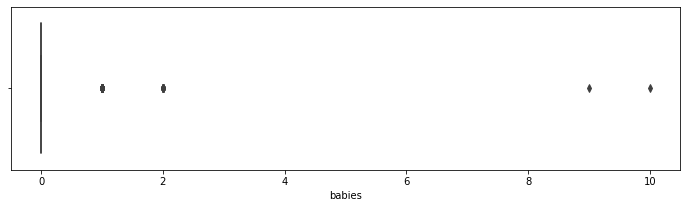

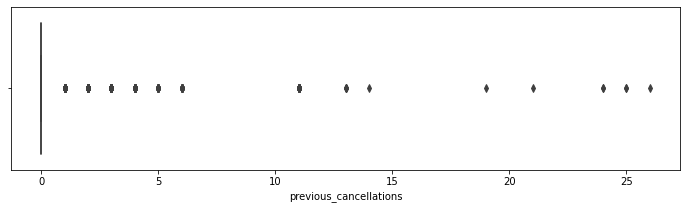

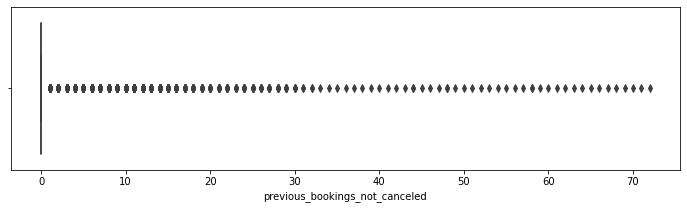

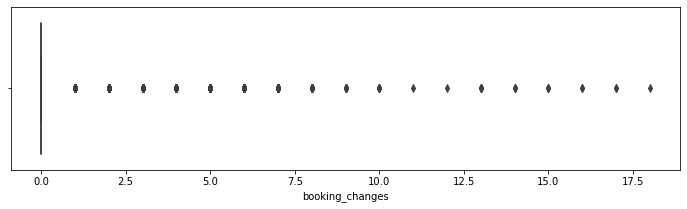

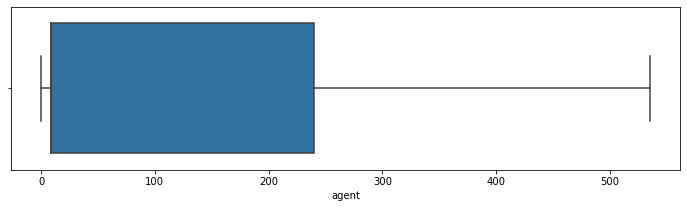

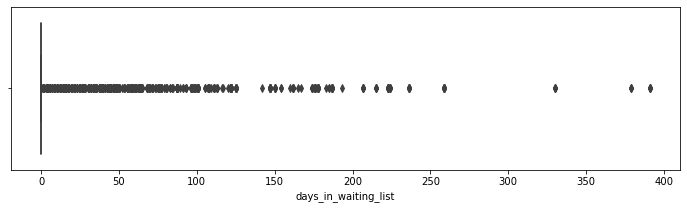

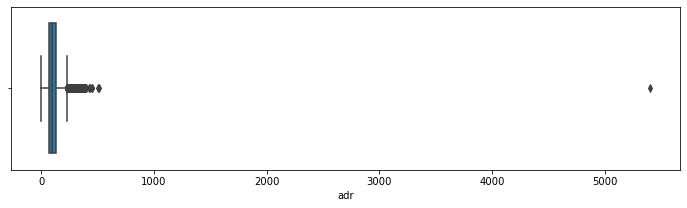

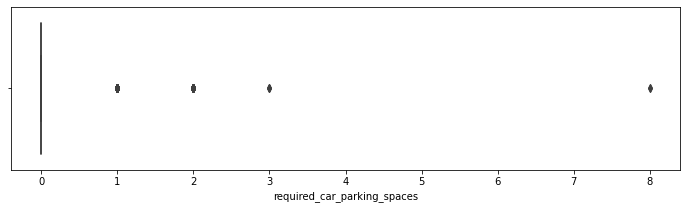

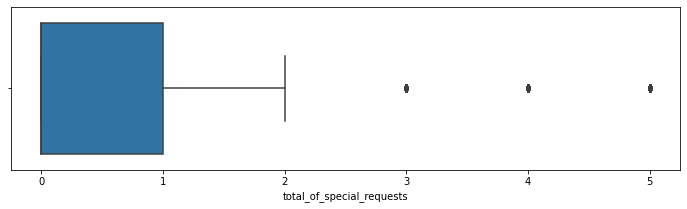

In [17]:
for i in df.select_dtypes(np.number).columns:
    plt.figure(figsize=(12,3))
    sns.boxplot(x=df[i])
    plt.show()

In [18]:
numerical.shape

(87229, 14)

In [19]:
# calculate the first quartile
Q1 = numerical.quantile(0.25)

# calculate the third quartile
Q3 = numerical.quantile(0.75)


IQR = Q3 - Q1


df_out = numerical[~((numerical < (Q1 - 1.5 * IQR)) | (numerical > (Q3 + 1.5 * IQR))).any(axis=1)]


df_out = df_out.reset_index(drop = True)
df_out.shape

(39940, 14)

In [20]:
df.shape

(87229, 31)

In [21]:
df.skew()

is_canceled                        1.006471
lead_time                          1.430806
arrival_date_year                 -0.297219
arrival_date_week_number           0.022375
arrival_date_day_of_month          0.000271
stays_in_weekend_nights            1.340323
stays_in_week_nights               2.575562
adults                            20.394419
children                           3.459587
babies                            21.128311
is_repeated_guest                  4.793615
previous_cancellations            34.329456
previous_bookings_not_canceled    20.456047
booking_changes                    5.069509
agent                              1.106264
days_in_waiting_list              19.467142
adr                               11.018648
required_car_parking_spaces        3.488641
total_of_special_requests          1.082382
dtype: float64

# Statistical Test

In [22]:
df['agent']=df['agent'].astype(object)

In [23]:
df['is_canceled']=df['is_canceled'].astype(object)  
categorical=df.select_dtypes('object')
categorical.drop('reservation_status',axis=1,inplace=True)

In [24]:

Stats=[]
pvalues=[]
Dof=[]
Expected_value=[]
import scipy.stats as st
for i in categorical.columns:
    observed_value=pd.crosstab(categorical[i],categorical['is_canceled'])
    stats,pvalue,dof,expected_value=st.chi2_contingency(observed_value)
    Stats.append(stats)
    pvalues.append(pvalue)
    Dof.append(dof)
    Expected_value.append(expected_value)
p_value=pd.DataFrame({"Columns":categorical.columns,'Pvalues':pvalues})


p_value

,Columns,Pvalues
0,hotel,7.284548e-101
1,is_canceled,0.000000e+00
2,arrival_date_year,9.962035e-148
3,arrival_date_month,1.475418e-129
4,arrival_date_week_number,1.107388e-123
5,arrival_date_day_of_month,4.387654e-05
6,meal,3.249800e-77
7,country,0.000000e+00
8,market_segment,0.000000e+00
9,distribution_channel,0.000000e+00


In [25]:
#ANNOVA



df.is_canceled=df.is_canceled.astype(np.number)
x=df.select_dtypes(include='number')
X=x.drop('is_canceled',axis='columns')
y=x['is_canceled']
from sklearn.feature_selection import SelectKBest,f_classif
kbest=SelectKBest(f_classif,k=len(X.columns))
kbest.fit(X,y)

imp_ft=round(pd.DataFrame(kbest.pvalues_),2)
imp_ft['Columns']=X.columns
imp_ft

,0,Columns
0,0.00,lead_time
1,0.00,stays_in_weekend_nights
2,0.00,stays_in_week_nights
3,0.00,adults
4,0.00,children
5,0.00,babies
6,0.00,previous_cancellations
7,0.00,previous_bookings_not_canceled
8,0.00,booking_changes
9,0.16,days_in_waiting_list


In [26]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.90,return_categories_list=True):
    threshold_value=int(threshold*len(column))
    categories_list=[]
    s=0
    counts=Counter(column)
    for i,j in counts.most_common():
        s+=dict(counts)[i]
        categories_list.append(i)
        if s>=threshold_value:
            break
    categories_list.append('Other')
    new_column=column.apply(lambda x: x if x in categories_list else 'Other')
    if(return_categories_list):
        return new_column,categories_list
    else:
        return new_column
transformed_column,new_category_list=cumulatively_categorise(categorical["country"],return_categories_list=True)
transformed_column.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Other', 'POL', 'DEU',
       'BEL', 'CHE', 'CN', 'ITA', 'NLD', 'SWE', 'BRA', 'CHN', 'AUT'],
      dtype=object)

In [27]:
transformed_column.nunique()

18

In [28]:

transformed_column_agent,new_category_list=cumulatively_categorise(df["agent"],return_categories_list=True)
transformed_column_agent.unique()

array([0.0, 'Other', 240.0, 15.0, 241.0, 8.0, 250.0, 5.0, 243.0, 242.0,
       3.0, 40.0, 96.0, 9.0, 177.0, 6.0, 171.0, 196.0, 314.0, 11.0, 1.0,
       10.0, 16.0, 7.0, 27.0, 14.0, 22.0, 28.0, 37.0, 83.0, 85.0, 138.0,
       229.0], dtype=object)

In [29]:
transformed_column_agent.nunique()

33

In [30]:
# pip install category_encoders

# Binary encoding

Binary Encoding
Binary encoding converts a category into binary digits. Each binary digit creates one feature column. If there are n unique categories, then binary encoding results in the only log(base 2)ⁿ features. In this example, we have four features; thus, the binary encoded features will be three features. Compared to One Hot Encoding, this will require fewer feature columns (for 100 categories, One Hot Encoding will have 100 features, while for Binary encoding, we will need just seven features).
For Binary encoding, one has to follow the following steps:
The categories are first converted to numeric order starting from 1 (order is created as categories appear in a dataset and do not mean any ordinal nature)
Then those integers are converted into binary code, so for example, 3 becomes 011, 4 becomes 100
Then the digits of the binary number form separate columns.

Binary encoding is a memory-efficient encoding scheme as it uses fewer features than one-hot encoding. Further, It reduces the curse of dimensionality for data with high cardinality.

In [31]:
import category_encoders as ce

df1=df.copy()

be=ce.BinaryEncoder(cols='country',return_df=True)
con=be.fit_transform(df1['country'])
con

,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
119385,0,0,0,0,1,1,1,0
119386,0,0,0,0,0,1,1,0
119387,0,0,0,0,1,1,0,1
119388,0,0,0,0,0,0,1,0


In [32]:
for i in con.columns:
    print(i)
    print(con[i].value_counts())

country_0
0    87088
1      141
Name: country_0, dtype: int64
country_1
0    85968
1     1261
Name: country_1, dtype: int64
country_2
0    82430
1     4799
Name: country_2, dtype: int64
country_3
0    73680
1    13549
Name: country_3, dtype: int64
country_4
0    70547
1    16682
Name: country_4, dtype: int64
country_5
0    53453
1    33776
Name: country_5, dtype: int64
country_6
0    49454
1    37775
Name: country_6, dtype: int64
country_7
1    47073
0    40156
Name: country_7, dtype: int64


# Base N encoder

In the numeral system, the Base or the radix is the number of digits or a combination of digits and letters used to represent the numbers. The most common base we use in our life is 10  or decimal system as here we use 10 unique digits i.e 0 to 9 to represent all the numbers. Another widely used system is binary i.e. the base is 2. It uses 0 and 1 i.e 2 digits to express all the numbers.

For Binary encoding, the Base is 2 which means it converts the numerical values of a category into its respective Binary form. If you want to change the Base of encoding scheme you may use Base N encoder. In the case when categories are more and binary encoding is not able to handle the dimensionality then we can use a larger base such as 4 or 8.

Hence BaseN encoding technique further reduces the number of features required to efficiently represent the data and improving memory usage. The default Base for Base N is 2 which is equivalent to Binary Encoding.

In [33]:
en=ce.BaseNEncoder(cols='country',return_df=True,base=5)
en_con=en.fit_transform(df1['country'])
en_con.head()

,country_0,country_1,country_2,country_3
0,0,0,0,1
1,0,0,0,1
2,0,0,0,2
3,0,0,0,2
4,0,0,0,2


In [34]:
for i in en_con.columns:
    print(i)
    print(en_con[i].value_counts())

country_0
0    87042
1      187
Name: country_0, dtype: int64
country_1
0    78711
1     6563
2      986
3      616
4      353
Name: country_1, dtype: int64
country_2
0    49867
1    15199
2     9324
3     9243
4     3596
Name: country_2, dtype: int64
country_3
1    40884
2    13714
4    13696
3    13047
0     5888
Name: country_3, dtype: int64


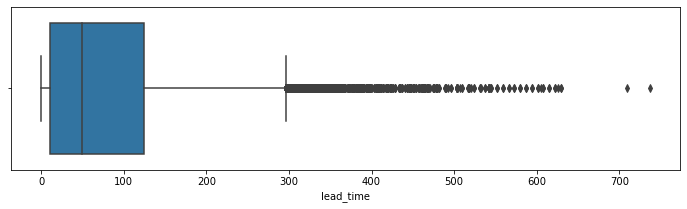

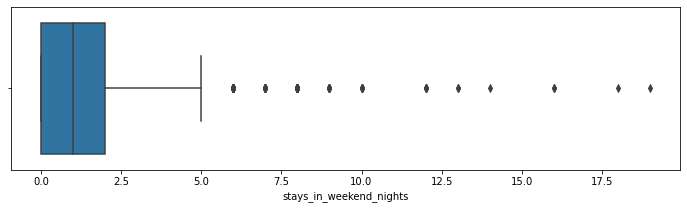

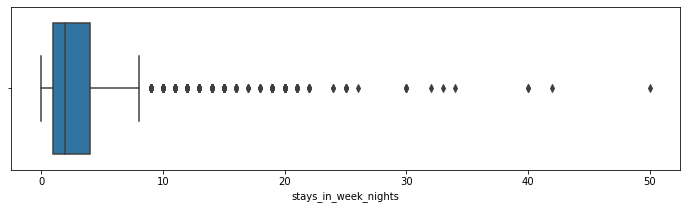

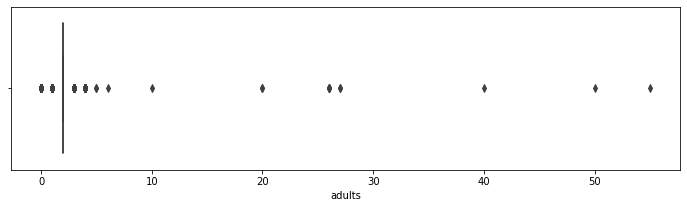

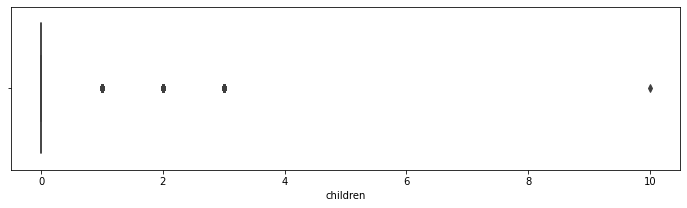

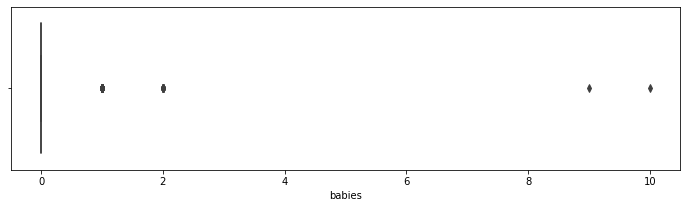

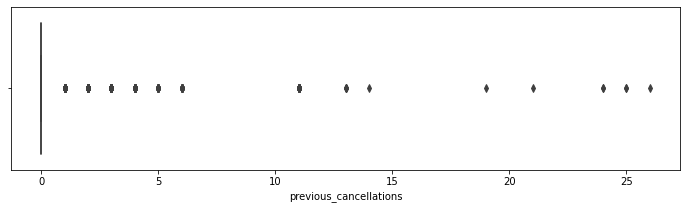

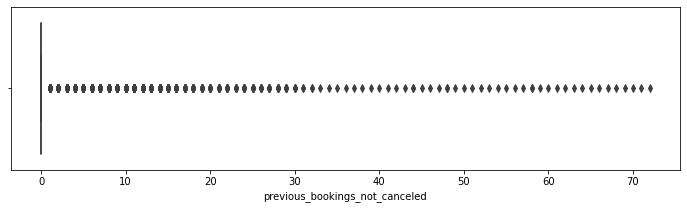

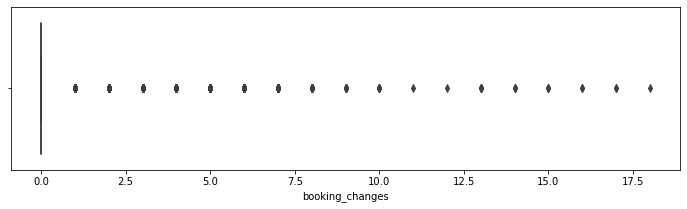

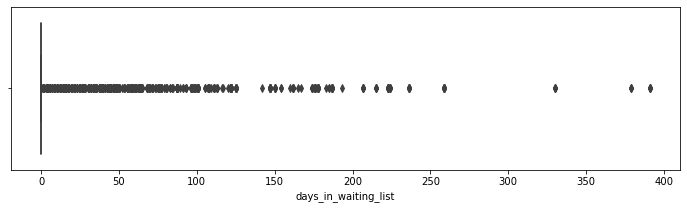

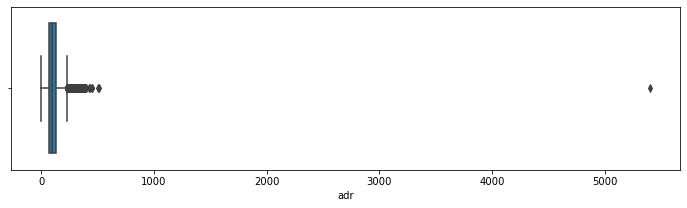

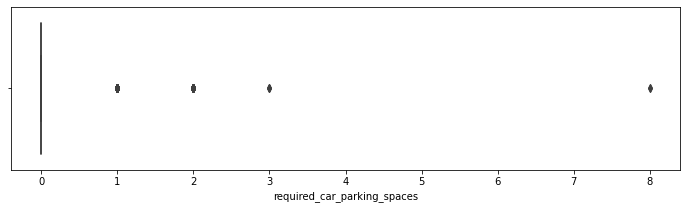

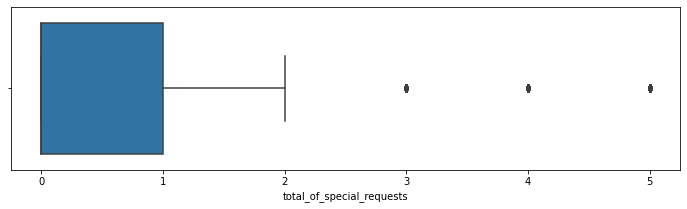

In [35]:
for i in df.select_dtypes(np.number).drop('is_canceled',axis=1).columns:
    plt.figure(figsize=(12,3))
    sns.boxplot(x=df[i])
    plt.show()

In [36]:
from sklearn.preprocessing import PowerTransformer
pp=PowerTransformer()

In [37]:
continuous=df.select_dtypes(np.number).drop('is_canceled',axis=1)

In [38]:
continuous.skew()

lead_time                          1.430806
stays_in_weekend_nights            1.340323
stays_in_week_nights               2.575562
adults                            20.394419
children                           3.459587
babies                            21.128311
previous_cancellations            34.329456
previous_bookings_not_canceled    20.456047
booking_changes                    5.069509
days_in_waiting_list              19.467142
adr                               11.018648
required_car_parking_spaces        3.488641
total_of_special_requests          1.082382
dtype: float64

In [39]:
cs=pp.fit_transform(continuous)
c_s=pd.DataFrame(cs,columns=continuous.columns)
c_s.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,1.828925,-1.134638,-2.094114,0.282059,-0.32566,-0.102903,-0.140178,-0.205577,2.151706,-0.099493,-2.997154,-0.302346,-0.965901
1,2.789100,-1.134638,-2.094114,0.282059,-0.32566,-0.102903,-0.140178,-0.205577,2.152102,-0.099493,-2.997154,-0.302346,-0.965901
2,-1.002337,-1.134638,-0.872649,-1.751145,-0.32566,-0.102903,-0.140178,-0.205577,-0.470379,-0.099493,-0.529647,-0.302346,-0.965901
3,-0.723976,-1.134638,-0.872649,-1.751145,-0.32566,-0.102903,-0.140178,-0.205577,-0.470379,-0.099493,-0.529647,-0.302346,-0.965901
4,-0.687007,-1.134638,-0.122002,0.282059,-0.32566,-0.102903,-0.140178,-0.205577,-0.470379,-0.099493,-0.062340,-0.302346,0.737030


In [40]:
c_s.skew()

lead_time                        -0.139203
stays_in_weekend_nights           0.029224
stays_in_week_nights              0.002646
adults                            0.320413
children                          2.745071
babies                            9.615108
previous_cancellations            6.993745
previous_bookings_not_canceled    4.658848
booking_changes                   1.655719
days_in_waiting_list              9.951660
adr                               0.405281
required_car_parking_spaces       3.005177
total_of_special_requests         0.200934
dtype: float64

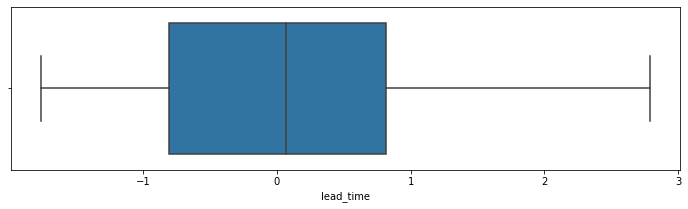

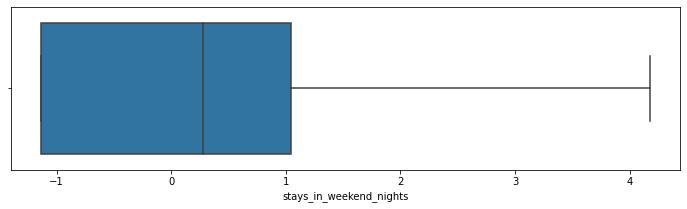

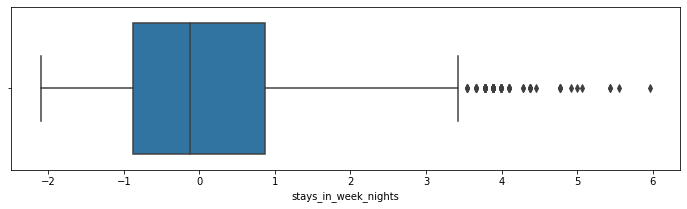

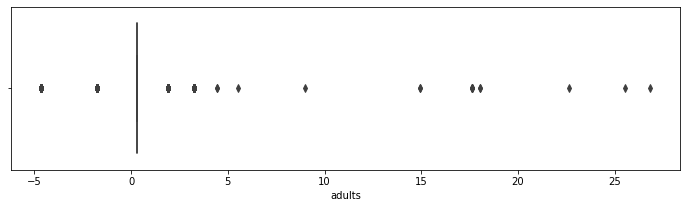

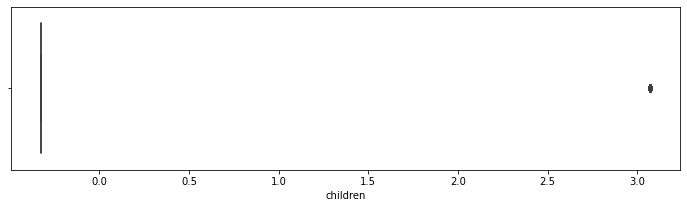

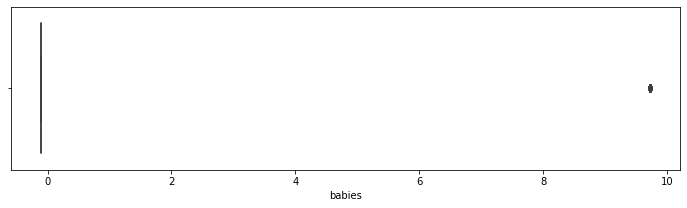

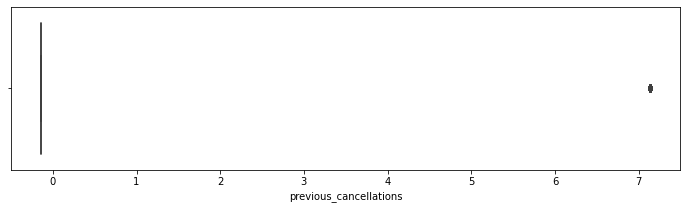

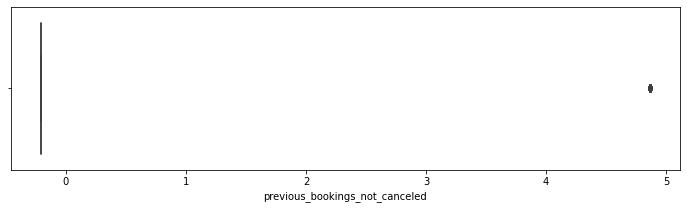

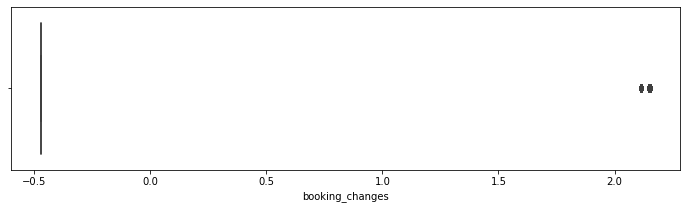

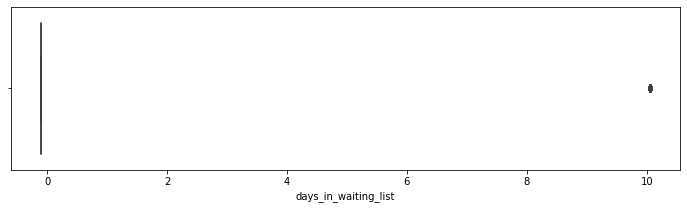

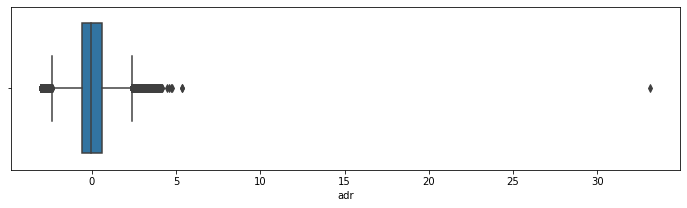

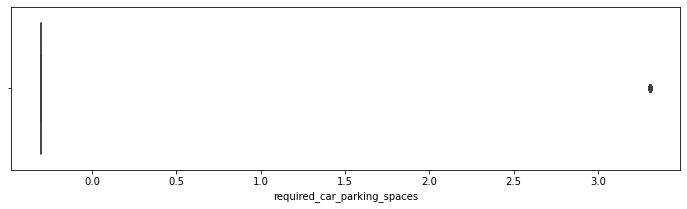

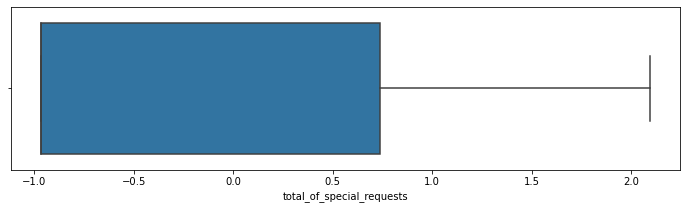

In [41]:
for i in df.select_dtypes(np.number).drop('is_canceled',axis=1).columns:
    plt.figure(figsize=(12,3))
    sns.boxplot(x=c_s[i])
    plt.show()

# Encoding

In [42]:
categorical.drop('is_canceled',axis=1,inplace=True)

y=df.is_canceled

In [43]:
# dummy_1=categorical[['hotel','arrival_date_year','arrival_date_month','arrival_date_day_of_month']]

In [44]:
antartica=['ATA','BVT','ATF','HMD','SGS']
aus=['ASM','AUS','COK','FJI','PYF','GUM','KIR','MHL','FSM','NRU','NCL','NZL','NIU','NFK','MNP','PLW','PNG','PCN','WSM','SLB',
     'TKL','TON','TUV','UMI','VUT','WLF']
asia=['AFG','AZE','BHR','BGD','BTN','CN','IOT','BRN','KHM','CHN','CXR','CCK','CYP','GEO','HKG','IND','IDN','IRN','IRQ','ISR','JPN',
      'JOR','KAZ','PRK','KOR','KWT','KGZ','LAO','LBN','MAC','MYS',
      'MDV','MNG','MMR','NPL','OMN','PAK','PSE','PHL','QAT','SAU','SGP','TMP','LKA','SYR','TWN','TJK','THA','TLS','TUR','TKM','ARE',
       'UZB','VNM','YEM']
europe=['ALA','ALB','AND','ARM','AUT','BLR','BEL','BIH','BGR','HRV','CZE','DNK','EST','FRO','FIN','FRA','DEU','GIB','GRC','GGY',
        'VAT','HUN','ISL','IRL','IMN','ITA','JEY','LVA','LIE','LTU','LUX','MKD','MLT','MDA','MCO','MNE','NLD','NOR','POL','PRT',
         'ROU','RUS','SMR','SRB','SVK','SVN','ESP','SJM','SWE','CHE','UKR','GBR']
NA=['AIA','ABW','BHS','BRB','BES','CAN','CRI','CUB','CUW','CYM','DMA','DOM','SLV','GRL','GRD','GLP','GTM','HTI','HND','JAM','MTQ','MEX','MSR','ANT',
    'NIC','PAN','PRI','BLM','KNA','LCA','MAF','SPM','VCT','VGB','SXM','TTO','TCA','UMI','USA','VIR']
SA=['ARG','BOL','BRA','CHL','COL','ECU','FLK','GUF','GUY','PRY','PER','SUR','URY','VEN']
africa=['DZA','AGO','BEN','BWA','BFA','BDI','CMR','CPV','CAF','TCD','COM','COG','COD','CIV','DJI','EGY','GNQ','ERI','ETH',
        'GAB','GMB','GHA','GIN','GNB','KEN','LSO','LBR','LBY','MDG','MWI','MLI','MRT','MUS','MYT','MAR','MOZ','NAM','NER',
        'NGA','REU','RWA','SHN','STP','SEN','SYC','SLE','SOM','ZAF','SSD','SDN','SWZ','TZA','TGO','TUN','UGA','ESH','ZMB',
        'ZWE']

In [45]:
cont=[]
o=[]
for i in df['country']:
    if i in antartica:
        cont.append('Antartica')
    elif i in aus:
        cont.append('Australia')
    elif i in asia:
        cont.append('Asia')
    elif i in europe:
        cont.append('Europe')
    elif i in SA:
        cont.append('South America')   
    elif i in africa:
        cont.append('africa')
    elif i in NA:
        cont.append('North America') 
    else:
        cont.append('Others')
        o.append(i)

In [46]:
df['Continents']=cont
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Continents
0,Resort Hotel,0.0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Europe
1,Resort Hotel,0.0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Europe
2,Resort Hotel,0.0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Europe
3,Resort Hotel,0.0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Europe
4,Resort Hotel,0.0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,Europe


In [47]:
c=df['Continents'].value_counts()
c

Europe           77186
Asia              3648
South America     2445
North America     2028
africa            1024
Australia          448
Others             447
Antartica            3
Name: Continents, dtype: int64

In [48]:
target=df.is_canceled.astype(object)
target.dtype

dtype('O')

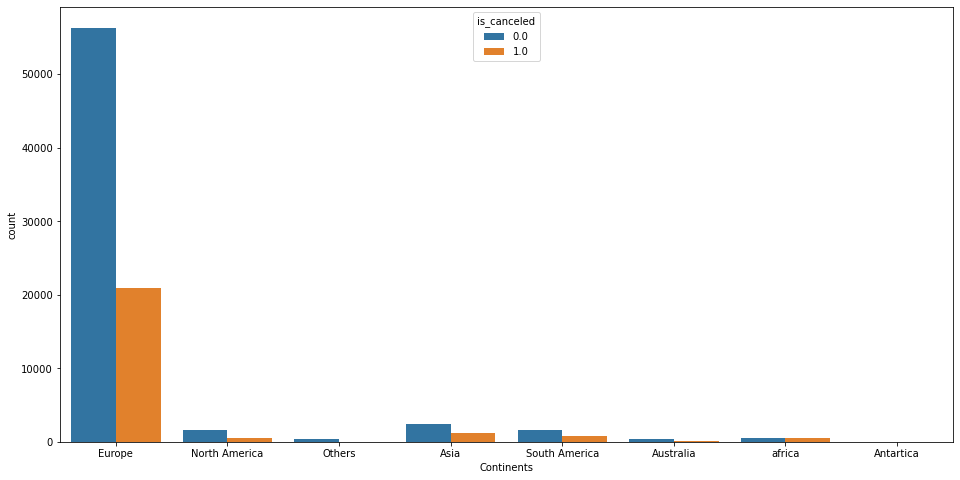

In [49]:

sns.countplot(df['Continents'],hue=target)
plt.show()

HYPOTHESIS

𝐻0 : The variables are independent

𝐻1 : The variables are not independent (i.e. variables are dependent)

alpha=0.05
p value =0.0
since p value is less than alpha , we  reject Ho

that means  The variables are not independent (i.e. variables are dependent)
therefore all categorical features here are significant.

In [50]:
observed_value=pd.crosstab(df['Continents'],target)
stats,pvalue,dof,expected_value=st.chi2_contingency(observed_value)
round(pd.Series(pvalue),2)

0    0.0
dtype: float64

In [51]:
#Significant.

In [52]:
#Agent

import category_encoders as ce

df1=df.copy()

be=ce.BinaryEncoder(cols='agent',return_df=True)
ag=be.fit_transform(df1['agent'])
ag

,agent_0,agent_1,agent_2,agent_3,agent_4,agent_5,agent_6,agent_7,agent_8
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
119385,1,0,0,0,0,1,1,1,0
119386,0,0,0,0,1,1,0,1,1
119387,0,0,0,0,1,1,0,1,1
119388,0,1,1,0,1,1,0,0,1


In [53]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Continents'],
      dtype='object')

In [54]:
 df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [55]:
sea=[]
for i in df['arrival_date_month']:
    if i in ['March','April','May']:
        sea.append('Spring')
    elif i in ['June','July','August']:
        sea.append('Summer')
    elif i in ['September', 'October', 'November']:
        sea.append('Autumn')
    else:
        sea.append('Winter')
        
        
df['months_n_seasons']=sea
df['months_n_seasons'].value_counts()

Summer    29041
Spring    23732
Autumn    18576
Winter    15880
Name: months_n_seasons, dtype: int64

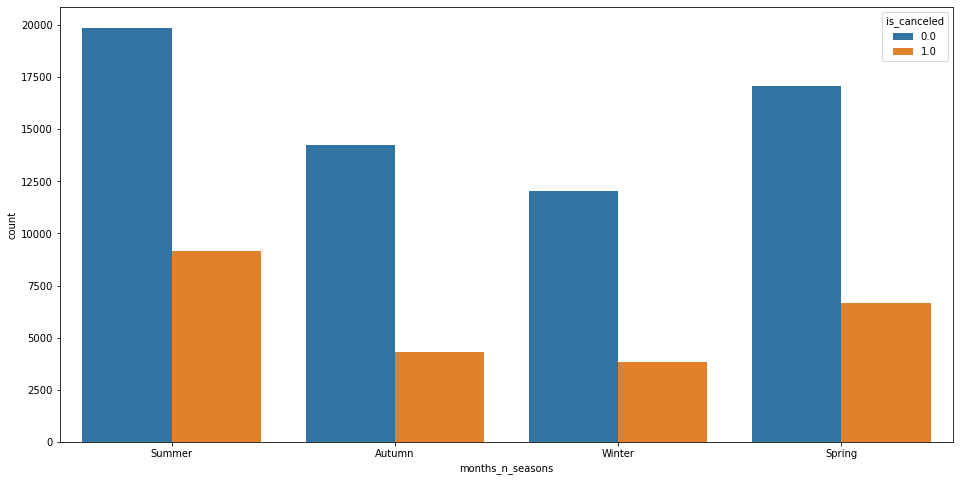

In [56]:
sns.countplot(df['months_n_seasons'],hue=target)
plt.show()

HYPOTHESIS

𝐻0 : The variables are independent

𝐻1 : The variables are not independent (i.e. variables are dependent)

alpha=0.05
p value =0.0
since p value is less than alpha , we  reject Ho

that means  The variables are not independent (i.e. variables are dependent)
therefore all categorical features here are significant.

In [57]:
observed_value=pd.crosstab(df['months_n_seasons'],target)
stats,pvalue,dof,expected_value=st.chi2_contingency(observed_value)
round(pvalue,2)

0.0

In [58]:
#significant.

In [59]:
df['arrival_date_day_of_month'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], dtype=object)

In [60]:
day=[]
for i in df['arrival_date_day_of_month']:
    if i in range(1,11):
        day.append('start_of_month')
    elif i in range(11,21):
        day.append('mid_of_month')
    else:
        day.append('end_of_month')
        
        
df['arrival_date_day_of_month_nw']=day
df['arrival_date_day_of_month_nw'].value_counts()

end_of_month      29971
mid_of_month      28929
start_of_month    28329
Name: arrival_date_day_of_month_nw, dtype: int64

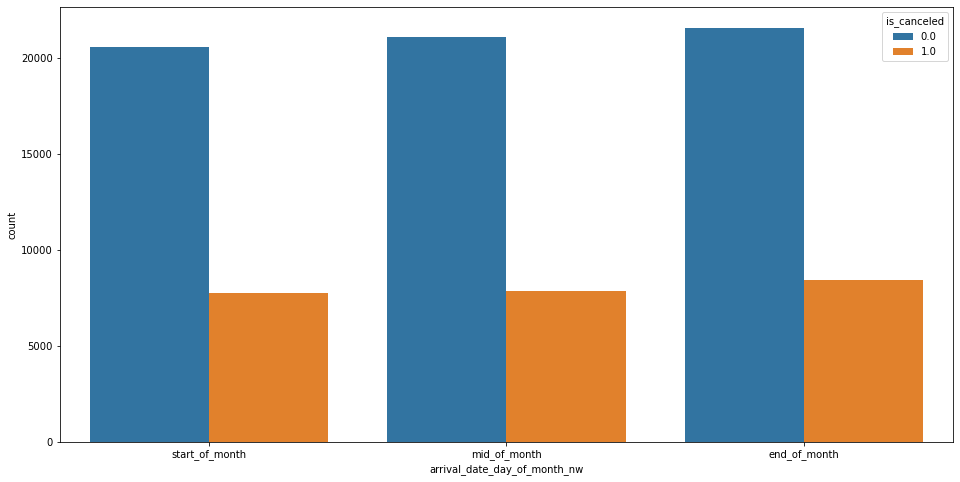

In [61]:
sns.countplot(df['arrival_date_day_of_month_nw'],hue=target)
plt.show()

In [62]:
observed_value=pd.crosstab(df['arrival_date_day_of_month_nw'],target)
stats,pvalue,dof,expected_value=st.chi2_contingency(observed_value)
round(pvalue,3)

0.03

In [63]:
#significant

In [64]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                33
adults                              14
children                             5
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                   9
assigned_room_type                  11
booking_changes                     19
deposit_type                         3
agent                              334
days_in_waiting_list               127
customer_type            

# Ecoding

In [65]:
df.select_dtypes(object).columns

Index(['hotel', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type', 'reservation_status',
       'Continents', 'months_n_seasons', 'arrival_date_day_of_month_nw'],
      dtype='object')

In [66]:
#arrival_date_week_number --drop

In [67]:
cat=df[['hotel', 'arrival_date_year', 'months_n_seasons', 'arrival_date_day_of_month_nw', 'meal',
       'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type','customer_type','Continents']]

In [68]:
num=df.select_dtypes(np.number)
num=num.drop('is_canceled',axis=1)
num.columns

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [69]:
#Dummy encoding

dummy=pd.get_dummies(cat,drop_first=True)
dummy.shape

(87229, 54)

In [70]:
d1=pd.concat([dummy,ag],axis=1)
d1.shape

(87229, 63)

In [71]:
d1.columns

Index(['hotel_Resort Hotel', 'arrival_date_year_2016',
       'arrival_date_year_2017', 'months_n_seasons_Spring',
       'months_n_seasons_Summer', 'months_n_seasons_Winter',
       'arrival_date_day_of_month_nw_mid_of_month',
       'arrival_date_day_of_month_nw_start_of_month', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'is_repeated_guest_1', 'reserved_room_type_B', 'reserved_room_type_C',
       'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F',
       'reserved_room_type_G', 'reserved_room_type_H', 'reserved_room_type_L',
       'assigned_room_type_B', 'assigned_room_type_C', 'assigned_roo

In [72]:
X=pd.concat([num,d1],axis=1)
X.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,Continents_africa,agent_0,agent_1,agent_2,agent_3,agent_4,agent_5,agent_6,agent_7,agent_8
0,342,0,0,2,0.0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,1
1,737,0,0,2,0.0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,1
2,7,0,1,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,13,0,1,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14,0,2,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [73]:
Y=target.astype('int64')

In [74]:
Y.dtype

dtype('int64')

In [75]:
X.isnull().sum().sum()

0

In [80]:
df_eda=df.copy()
df_eda.to_csv('DF_EDA.csv', index=False,header=True)


# Train Test Split

In [76]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [78]:
X.to_csv('cp_X.csv', index=False,header=True)


In [ ]:
abcd

In [79]:
#BASE MODEL

In [80]:


logreg=LogisticRegression()


logreg.fit(x_train, y_train)
y_train_pred = logreg.predict(x_train)
y_train_prob = logreg.predict_proba(x_train)

print('Train - results')
print()
print(confusion_matrix(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

y_test_pred = logreg.predict(x_test)
y_test_prob = logreg.predict_proba(x_test)

print('\n')
print('Test - results')
print()
print(confusion_matrix(y_test, y_test_pred))
print()
print(accuracy_score(y_test, y_test_pred))
print()
print(classification_report(y_test, y_test_pred))

Train - results

[[46974  3609]
 [11193  8007]]
0.7878853015777482
              precision    recall  f1-score   support

           0       0.81      0.93      0.86     50583
           1       0.69      0.42      0.52     19200

    accuracy                           0.79     69783
   macro avg       0.75      0.67      0.69     69783
weighted avg       0.78      0.79      0.77     69783



Test - results

[[11707   930]
 [ 2788  2021]]

0.7868852459016393

              precision    recall  f1-score   support

           0       0.81      0.93      0.86     12637
           1       0.68      0.42      0.52      4809

    accuracy                           0.79     17446
   macro avg       0.75      0.67      0.69     17446
weighted avg       0.77      0.79      0.77     17446



In [81]:
#RF


from sklearn.ensemble import RandomForestClassifier


# type your code here
rf_classification = RandomForestClassifier()

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(x_train, y_train)

# predict the attrition for test set
y_pred_train = rf_model.predict(x_train)

y_pred_test = rf_model.predict(x_test)

# generate a classification report
print(classification_report(y_test, y_pred_test))

print()

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     12637
           1       0.72      0.56      0.63      4809

    accuracy                           0.82     17446
   macro avg       0.78      0.74      0.75     17446
weighted avg       0.81      0.82      0.81     17446


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50583
           1       0.99      0.99      0.99     19200

    accuracy                           1.00     69783
   macro avg       0.99      0.99      0.99     69783
weighted avg       1.00      1.00      1.00     69783



In [98]:
#RF

rf_classification = RandomForestClassifier(n_estimators=50,max_depth=20)


rf_model = rf_classification.fit(x_train, y_train)


y_pred_train = rf_model.predict(x_train)

y_pred_test = rf_model.predict(x_test)

print(classification_report(y_test, y_pred_test))

print()

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88     12637
           1       0.74      0.51      0.61      4809

    accuracy                           0.82     17446
   macro avg       0.79      0.72      0.74     17446
weighted avg       0.81      0.82      0.81     17446


              precision    recall  f1-score   support

           0       0.88      0.96      0.92     50583
           1       0.85      0.66      0.74     19200

    accuracy                           0.87     69783
   macro avg       0.86      0.81      0.83     69783
weighted avg       0.87      0.87      0.87     69783



In [99]:
# from sklearn.model_selection import GridSearchCV

# tuned_paramaters = [{'criterion': ['entropy', 'gini'],
#                      'n_estimators': [ 50,100,130,150,200,250,300],
#                      'max_depth': range(3,10),
#                      'max_features': ['sqrt', 'log2'],
#                      'min_samples_split': [2, 5, 8, 10],
#                      'min_samples_leaf': [1, 5, 9],
#                      'max_leaf_nodes': [2, 5, 8, 11]}]
 

# random_forest_classification = RandomForestClassifier(random_state = 10)

# rf_grid = GridSearchCV(estimator = random_forest_classification, 
#                        param_grid = tuned_paramaters, 
#                        cv = 5)


# rf_grid_model = rf_grid.fit(x_train, y_train)


# print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [102]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [103]:
LR=LogisticRegression()
DT=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
RF=RandomForestClassifier()
AB=AdaBoostClassifier()
GB=GradientBoostingClassifier()
XG=XGBClassifier()
models = []
models.append(('Logistic', LR))
models.append(('Knn', KNN))
models.append(('DT', DT))
models.append(('RandomForest', RF))
models.append(('AdaBoost', AB))
models.append(('gradBoost', GB))
models.append(('XGBoost',XG))

In [104]:
results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True,n_splits=10,random_state=10)
    cv_results = cross_val_score(model, X, y,cv=kfold)
    results.append(cv_results)
    names.append(name)
    print("Model-Name  -",name,'Bias Error -', np.mean(1-cv_results),'Varience Error  -',np.std(cv_results,ddof=1))
    
    
    model1=model.fit(x_train,y_train)
    y_pred=model1.predict(x_test)
    y_pred_train = model1.predict(x_train)
    
    
    print("Accuracy score::- \n",accuracy_score(y_test,y_pred))
    print()
    print("AUC SCORE::- \n",roc_auc_score(y_test,y_pred))
    print()
    print('TRAIN REPORT')
    print(classification_report(y_train, y_pred_train))  
    print()
    print('TEST REPORT')
    print("Classification Report \n",classification_report(y_test,y_pred))
    print('*'*50)


Model-Name  - Logistic Bias Error - 0.21257834079716562 Varience Error  - 0.0036572651794053203
Accuracy score::- 
 0.7868852459016393

AUC SCORE::- 
 0.6733301374185753

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.81      0.93      0.86     50583
           1       0.69      0.42      0.52     19200

    accuracy                           0.79     69783
   macro avg       0.75      0.67      0.69     69783
weighted avg       0.78      0.79      0.77     69783


TEST REPORT
Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.93      0.86     12637
           1       0.68      0.42      0.52      4809

    accuracy                           0.79     17446
   macro avg       0.75      0.67      0.69     17446
weighted avg       0.77      0.79      0.77     17446

**************************************************
Model-Name  - Knn Bias Error - 0.28379313105913634 Varience Error  - 0.004

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\91701\Desktop\gl\capstone datasets\3_hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
X=pd.read_csv(r"C:\Users\91701\Desktop\gl\capstone\cp_X.csv")
X.shape

(87229, 76)

In [6]:
X.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,Continents_africa,agent_0,agent_1,agent_2,agent_3,agent_4,agent_5,agent_6,agent_7,agent_8
0,342,0,0,2,0.0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,1
1,737,0,0,2,0.0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,1
2,7,0,1,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,13,0,1,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14,0,2,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [7]:
df_eda=pd.read_csv(r"C:\Users\91701\Desktop\gl\capstone\DF_EDA.csv")
df_eda.shape

(87229, 34)

In [10]:
df_eda.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Continents,months_n_seasons,arrival_date_day_of_month_nw
0,Resort Hotel,0.0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,Europe,Summer,start_of_month
1,Resort Hotel,0.0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,Europe,Summer,start_of_month
2,Resort Hotel,0.0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,Europe,Summer,start_of_month
3,Resort Hotel,0.0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,Europe,Summer,start_of_month
4,Resort Hotel,0.0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,Europe,Summer,start_of_month


In [9]:
df_eda['agent']=df_eda['agent'].astype('int64')

In [11]:

df_eda['agent']=df_eda['agent'].astype(object)
df_eda['arrival_date_year']=df_eda.arrival_date_year.astype('object')
df_eda['arrival_date_week_number']=df_eda.arrival_date_week_number.astype('object')

df_eda['arrival_date_day_of_month']=df_eda.arrival_date_day_of_month.astype('object')
df_eda['is_canceled']=df_eda['is_canceled'].astype('int64')

In [12]:
df_eda['is_repeated_guest']=df_eda.is_repeated_guest.astype('object')

In [13]:
df_eda.select_dtypes(np.number).columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [14]:
df_eda.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                  object
arrival_date_month                 object
arrival_date_week_number           object
arrival_date_day_of_month          object
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [15]:
num=df_eda.select_dtypes(np.number)
num.drop(['is_canceled'],axis=1,inplace=True)
num.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,0,0,2,0.0,0,0,0,3,0,0.0,0,0
1,737,0,0,2,0.0,0,0,0,4,0,0.0,0,0
2,7,0,1,1,0.0,0,0,0,0,0,75.0,0,0
3,13,0,1,1,0.0,0,0,0,0,0,75.0,0,0
4,14,0,2,2,0.0,0,0,0,0,0,98.0,0,1


In [16]:
num.columns

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [17]:
cat=df_eda.select_dtypes(object)
cat.head()

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,reservation_status,reservation_status_date,Continents,months_n_seasons,arrival_date_day_of_month_nw
0,Resort Hotel,2015,July,27,1,BB,PRT,Direct,Direct,0,C,C,No Deposit,0,Transient,Check-Out,2015-07-01,Europe,Summer,start_of_month
1,Resort Hotel,2015,July,27,1,BB,PRT,Direct,Direct,0,C,C,No Deposit,0,Transient,Check-Out,2015-07-01,Europe,Summer,start_of_month
2,Resort Hotel,2015,July,27,1,BB,GBR,Direct,Direct,0,A,C,No Deposit,0,Transient,Check-Out,2015-07-02,Europe,Summer,start_of_month
3,Resort Hotel,2015,July,27,1,BB,GBR,Corporate,Corporate,0,A,A,No Deposit,304,Transient,Check-Out,2015-07-02,Europe,Summer,start_of_month
4,Resort Hotel,2015,July,27,1,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,240,Transient,Check-Out,2015-07-03,Europe,Summer,start_of_month


In [18]:
cat_raw=cat.drop(['Continents','months_n_seasons','arrival_date_day_of_month_nw'],axis=1)
cat_raw.columns

Index(['hotel', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [19]:
Y=df_eda.is_canceled.astype('int64')


In [20]:
cat_raw.drop(['reservation_status_date','reservation_status'],axis=1,inplace=True)
cat_raw.columns

Index(['hotel', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type'],
      dtype='object')

In [21]:
df_set=pd.concat([num,cat_raw],axis=1)
df_set.dtypes

lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
hotel                              object
arrival_date_year                  object
arrival_date_month                 object
arrival_date_week_number           object
arrival_date_day_of_month          object
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
reserved_room_type                

In [22]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import cohen_kappa_score,ConfusionMatrixDisplay,confusion_matrix
from xgboost import XGBClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import os
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [24]:
df_set.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type
0,342,0,0,2,0.0,0,0,0,3,0,...,BB,PRT,Direct,Direct,0,C,C,No Deposit,0,Transient
1,737,0,0,2,0.0,0,0,0,4,0,...,BB,PRT,Direct,Direct,0,C,C,No Deposit,0,Transient
2,7,0,1,1,0.0,0,0,0,0,0,...,BB,GBR,Direct,Direct,0,A,C,No Deposit,0,Transient
3,13,0,1,1,0.0,0,0,0,0,0,...,BB,GBR,Corporate,Corporate,0,A,A,No Deposit,304,Transient
4,14,0,2,2,0.0,0,0,0,0,0,...,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,240,Transient


In [25]:
df_set.select_dtypes(object).columns

Index(['hotel', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type'],
      dtype='object')

# CATBOOST 

With all features


In [85]:
from catboost import CatBoostClassifier,Pool

cb = CatBoostClassifier()

from sklearn.model_selection import train_test_split
X_trainn, X_testt, y_trainn, y_testt = train_test_split(df_set, Y, test_size=0.20, 
                                                    random_state=1)

pool_train = Pool(X_trainn, y_trainn,
                  cat_features =['hotel', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type'])

pool_test = Pool(X_testt, cat_features =['hotel', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type'])

cb.fit(pool_train)
y_pred = cb.predict(pool_test)


y_pred = cb.predict(pool_test)

y_pred_train = cb.predict(pool_train)


print("Accuracy score::- \n",accuracy_score(y_testt,y_pred))
print()
print("AUC SCORE::- \n",roc_auc_score(y_testt,y_pred))
print()
print('Kappa score : \n',cohen_kappa_score(y_testt,y_pred))
print()
print()
print('TRAIN REPORT')
print(classification_report(y_trainn, y_pred_train))  
print()
print('TEST REPORT')
print("Classification Report \n",classification_report(y_testt,y_pred))

Learning rate set to 0.063127
0:	learn: 0.6527176	total: 591ms	remaining: 9m 50s
1:	learn: 0.6278910	total: 1.14s	remaining: 9m 26s
2:	learn: 0.5994304	total: 1.55s	remaining: 8m 35s
3:	learn: 0.5808597	total: 1.95s	remaining: 8m 6s
4:	learn: 0.5549098	total: 2.56s	remaining: 8m 30s
5:	learn: 0.5322387	total: 2.97s	remaining: 8m 11s
6:	learn: 0.5099493	total: 3.4s	remaining: 8m 2s
7:	learn: 0.4943404	total: 3.75s	remaining: 7m 44s
8:	learn: 0.4797289	total: 4.04s	remaining: 7m 25s
9:	learn: 0.4686095	total: 4.4s	remaining: 7m 15s
10:	learn: 0.4590996	total: 4.83s	remaining: 7m 14s
11:	learn: 0.4493215	total: 5.15s	remaining: 7m 4s
12:	learn: 0.4411759	total: 5.51s	remaining: 6m 58s
13:	learn: 0.4350554	total: 5.94s	remaining: 6m 58s
14:	learn: 0.4279180	total: 6.37s	remaining: 6m 58s
15:	learn: 0.4233703	total: 6.69s	remaining: 6m 51s
16:	learn: 0.4200771	total: 6.98s	remaining: 6m 43s
17:	learn: 0.4160527	total: 7.29s	remaining: 6m 37s
18:	learn: 0.4123364	total: 7.68s	remaining: 6m 3

158:	learn: 0.3244481	total: 54.3s	remaining: 4m 47s
159:	learn: 0.3243514	total: 54.5s	remaining: 4m 46s
160:	learn: 0.3242315	total: 54.9s	remaining: 4m 45s
161:	learn: 0.3241278	total: 55.2s	remaining: 4m 45s
162:	learn: 0.3240412	total: 55.5s	remaining: 4m 45s
163:	learn: 0.3238876	total: 55.8s	remaining: 4m 44s
164:	learn: 0.3236634	total: 56.1s	remaining: 4m 43s
165:	learn: 0.3236315	total: 56.4s	remaining: 4m 43s
166:	learn: 0.3235745	total: 56.7s	remaining: 4m 42s
167:	learn: 0.3234964	total: 57s	remaining: 4m 42s
168:	learn: 0.3233500	total: 57.3s	remaining: 4m 41s
169:	learn: 0.3232729	total: 57.7s	remaining: 4m 41s
170:	learn: 0.3231773	total: 58s	remaining: 4m 41s
171:	learn: 0.3230502	total: 58.3s	remaining: 4m 40s
172:	learn: 0.3229651	total: 58.6s	remaining: 4m 40s
173:	learn: 0.3228292	total: 58.9s	remaining: 4m 39s
174:	learn: 0.3227624	total: 59.2s	remaining: 4m 39s
175:	learn: 0.3225699	total: 59.6s	remaining: 4m 38s
176:	learn: 0.3224743	total: 59.9s	remaining: 4m 3

312:	learn: 0.3110233	total: 1m 44s	remaining: 3m 49s
313:	learn: 0.3109829	total: 1m 44s	remaining: 3m 49s
314:	learn: 0.3109227	total: 1m 45s	remaining: 3m 48s
315:	learn: 0.3108793	total: 1m 45s	remaining: 3m 48s
316:	learn: 0.3108463	total: 1m 45s	remaining: 3m 48s
317:	learn: 0.3107853	total: 1m 46s	remaining: 3m 47s
318:	learn: 0.3107498	total: 1m 46s	remaining: 3m 47s
319:	learn: 0.3106261	total: 1m 46s	remaining: 3m 46s
320:	learn: 0.3105387	total: 1m 47s	remaining: 3m 46s
321:	learn: 0.3105003	total: 1m 47s	remaining: 3m 46s
322:	learn: 0.3104447	total: 1m 47s	remaining: 3m 45s
323:	learn: 0.3103632	total: 1m 48s	remaining: 3m 45s
324:	learn: 0.3102847	total: 1m 48s	remaining: 3m 45s
325:	learn: 0.3101720	total: 1m 48s	remaining: 3m 44s
326:	learn: 0.3100298	total: 1m 49s	remaining: 3m 44s
327:	learn: 0.3099715	total: 1m 49s	remaining: 3m 44s
328:	learn: 0.3098828	total: 1m 49s	remaining: 3m 43s
329:	learn: 0.3098429	total: 1m 50s	remaining: 3m 43s
330:	learn: 0.3097912	total:

466:	learn: 0.3033007	total: 2m 35s	remaining: 2m 57s
467:	learn: 0.3032592	total: 2m 36s	remaining: 2m 57s
468:	learn: 0.3032429	total: 2m 36s	remaining: 2m 57s
469:	learn: 0.3032256	total: 2m 36s	remaining: 2m 56s
470:	learn: 0.3031647	total: 2m 37s	remaining: 2m 56s
471:	learn: 0.3030892	total: 2m 37s	remaining: 2m 56s
472:	learn: 0.3030602	total: 2m 37s	remaining: 2m 55s
473:	learn: 0.3030492	total: 2m 37s	remaining: 2m 55s
474:	learn: 0.3029211	total: 2m 38s	remaining: 2m 55s
475:	learn: 0.3028685	total: 2m 38s	remaining: 2m 54s
476:	learn: 0.3028155	total: 2m 39s	remaining: 2m 54s
477:	learn: 0.3027950	total: 2m 39s	remaining: 2m 54s
478:	learn: 0.3027574	total: 2m 39s	remaining: 2m 53s
479:	learn: 0.3026962	total: 2m 40s	remaining: 2m 53s
480:	learn: 0.3026158	total: 2m 40s	remaining: 2m 53s
481:	learn: 0.3026030	total: 2m 40s	remaining: 2m 52s
482:	learn: 0.3025528	total: 2m 40s	remaining: 2m 52s
483:	learn: 0.3025436	total: 2m 41s	remaining: 2m 51s
484:	learn: 0.3025066	total:

619:	learn: 0.2976099	total: 3m 28s	remaining: 2m 7s
620:	learn: 0.2975949	total: 3m 28s	remaining: 2m 7s
621:	learn: 0.2975836	total: 3m 29s	remaining: 2m 7s
622:	learn: 0.2975563	total: 3m 29s	remaining: 2m 6s
623:	learn: 0.2975437	total: 3m 29s	remaining: 2m 6s
624:	learn: 0.2975290	total: 3m 30s	remaining: 2m 6s
625:	learn: 0.2974400	total: 3m 30s	remaining: 2m 5s
626:	learn: 0.2973652	total: 3m 30s	remaining: 2m 5s
627:	learn: 0.2973252	total: 3m 31s	remaining: 2m 5s
628:	learn: 0.2972906	total: 3m 31s	remaining: 2m 4s
629:	learn: 0.2972538	total: 3m 31s	remaining: 2m 4s
630:	learn: 0.2971987	total: 3m 32s	remaining: 2m 4s
631:	learn: 0.2971403	total: 3m 32s	remaining: 2m 3s
632:	learn: 0.2971188	total: 3m 32s	remaining: 2m 3s
633:	learn: 0.2971044	total: 3m 33s	remaining: 2m 3s
634:	learn: 0.2970658	total: 3m 33s	remaining: 2m 2s
635:	learn: 0.2970586	total: 3m 33s	remaining: 2m 2s
636:	learn: 0.2970115	total: 3m 34s	remaining: 2m 2s
637:	learn: 0.2969922	total: 3m 34s	remaining:

773:	learn: 0.2922541	total: 4m 22s	remaining: 1m 16s
774:	learn: 0.2922313	total: 4m 23s	remaining: 1m 16s
775:	learn: 0.2922098	total: 4m 23s	remaining: 1m 16s
776:	learn: 0.2921698	total: 4m 23s	remaining: 1m 15s
777:	learn: 0.2921129	total: 4m 24s	remaining: 1m 15s
778:	learn: 0.2920633	total: 4m 24s	remaining: 1m 15s
779:	learn: 0.2920361	total: 4m 25s	remaining: 1m 14s
780:	learn: 0.2920075	total: 4m 25s	remaining: 1m 14s
781:	learn: 0.2919693	total: 4m 25s	remaining: 1m 14s
782:	learn: 0.2919496	total: 4m 26s	remaining: 1m 13s
783:	learn: 0.2919355	total: 4m 26s	remaining: 1m 13s
784:	learn: 0.2918888	total: 4m 26s	remaining: 1m 13s
785:	learn: 0.2918608	total: 4m 27s	remaining: 1m 12s
786:	learn: 0.2918263	total: 4m 27s	remaining: 1m 12s
787:	learn: 0.2918050	total: 4m 28s	remaining: 1m 12s
788:	learn: 0.2917574	total: 4m 28s	remaining: 1m 11s
789:	learn: 0.2916756	total: 4m 28s	remaining: 1m 11s
790:	learn: 0.2916665	total: 4m 29s	remaining: 1m 11s
791:	learn: 0.2916519	total:

929:	learn: 0.2877450	total: 5m 16s	remaining: 23.8s
930:	learn: 0.2877158	total: 5m 16s	remaining: 23.4s
931:	learn: 0.2877031	total: 5m 16s	remaining: 23.1s
932:	learn: 0.2876681	total: 5m 17s	remaining: 22.8s
933:	learn: 0.2876510	total: 5m 17s	remaining: 22.4s
934:	learn: 0.2876261	total: 5m 17s	remaining: 22.1s
935:	learn: 0.2876117	total: 5m 17s	remaining: 21.7s
936:	learn: 0.2875807	total: 5m 18s	remaining: 21.4s
937:	learn: 0.2875239	total: 5m 18s	remaining: 21.1s
938:	learn: 0.2874937	total: 5m 19s	remaining: 20.7s
939:	learn: 0.2874423	total: 5m 19s	remaining: 20.4s
940:	learn: 0.2874242	total: 5m 19s	remaining: 20.1s
941:	learn: 0.2873535	total: 5m 20s	remaining: 19.7s
942:	learn: 0.2873158	total: 5m 20s	remaining: 19.4s
943:	learn: 0.2872840	total: 5m 20s	remaining: 19s
944:	learn: 0.2872412	total: 5m 21s	remaining: 18.7s
945:	learn: 0.2872250	total: 5m 21s	remaining: 18.4s
946:	learn: 0.2872129	total: 5m 21s	remaining: 18s
947:	learn: 0.2871985	total: 5m 22s	remaining: 17.

In [ ]:
# Over fitting

# Catboost  Over Sampling

In [88]:
from catboost import CatBoostClassifier,Pool

cb = CatBoostClassifier()

from sklearn.model_selection import train_test_split
X_trainn, X_testt, y_trainn, y_testt = train_test_split(df_set, Y, test_size=0.20, 
                                                    random_state=1)

from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=42)
X_reo, y_reo = rus.fit_resample(X_trainn, y_trainn)



pool_train = Pool(X_reo, y_reo,
                  cat_features = ['hotel', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type'])

pool_test = Pool(X_testt, cat_features =['hotel', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type'])

cb.fit(pool_train)
y_pred_cat= cb.predict(pool_test)




y_pred_train_cat = cb.predict(pool_train)


print("Accuracy score::- \n",accuracy_score(y_testt,y_pred_cat))
print()
print("AUC SCORE::- \n",roc_auc_score(y_testt,y_pred_cat))
print()
print('Kappa score : \n',cohen_kappa_score(y_testt,y_pred_cat))
print()
print()
print('TRAIN REPORT')
print(classification_report(y_reo, y_pred_train_cat))  
print()
print('TEST REPORT')
print("Classification Report \n",classification_report(y_testt,y_pred_cat))
print()
print(confusion_matrix(y_testt,y_pred_cat))

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.073973
0:	learn: 0.6510890	total: 532ms	remaining: 8m 51s
1:	learn: 0.6163362	total: 1.01s	remaining: 8m 24s
2:	learn: 0.5876749	total: 1.48s	remaining: 8m 13s
3:	learn: 0.5649723	total: 1.94s	remaining: 8m 3s
4:	learn: 0.5465669	total: 2.4s	remaining: 7m 58s
5:	learn: 0.5300580	total: 2.92s	remaining: 8m 4s
6:	learn: 0.5185951	total: 3.37s	remaining: 7m 57s
7:	learn: 0.5079640	total: 3.88s	remaining: 8m
8:	learn: 0.5003706	total: 4.3s	remaining: 7m 53s
9:	learn: 0.4929121	total: 4.75s	remaining: 7m 50s
10:	learn: 0.4862362	total: 5.25s	remaining: 7m 52s
11:	learn: 0.4785196	total: 5.74s	remaining: 7m 52s
12:	learn: 0.4709899	total: 6.21s	remaining: 7m 51s
13:	learn: 0.4661179	total: 6.64s	remaining: 7m 48s
14:	learn: 0.4586980	total: 7.1s	remaining: 7m 45s
15:	learn: 0.4515199	total: 7.59s	remaining: 7m 47s
16:	learn: 0.4478303	total: 8.01s	remaining: 7m 42s
17:	learn: 0.4438141	total: 8.5s	remaining: 7m 43s
18:	learn: 0.4402345	total: 9.03s	remaining: 7m 46s
19

157:	learn: 0.3052670	total: 1m 18s	remaining: 6m 55s
158:	learn: 0.3050253	total: 1m 18s	remaining: 6m 55s
159:	learn: 0.3048762	total: 1m 19s	remaining: 6m 55s
160:	learn: 0.3043429	total: 1m 19s	remaining: 6m 54s
161:	learn: 0.3035394	total: 1m 19s	remaining: 6m 53s
162:	learn: 0.3033594	total: 1m 20s	remaining: 6m 52s
163:	learn: 0.3032523	total: 1m 20s	remaining: 6m 52s
164:	learn: 0.3025039	total: 1m 21s	remaining: 6m 52s
165:	learn: 0.3024443	total: 1m 21s	remaining: 6m 51s
166:	learn: 0.3022155	total: 1m 22s	remaining: 6m 50s
167:	learn: 0.3020923	total: 1m 22s	remaining: 6m 50s
168:	learn: 0.3019864	total: 1m 23s	remaining: 6m 49s
169:	learn: 0.3019115	total: 1m 23s	remaining: 6m 49s
170:	learn: 0.3017312	total: 1m 24s	remaining: 6m 48s
171:	learn: 0.3015805	total: 1m 24s	remaining: 6m 48s
172:	learn: 0.3014922	total: 1m 25s	remaining: 6m 47s
173:	learn: 0.3013406	total: 1m 25s	remaining: 6m 47s
174:	learn: 0.3012665	total: 1m 26s	remaining: 6m 46s
175:	learn: 0.3012333	total:

310:	learn: 0.2797687	total: 2m 35s	remaining: 5m 43s
311:	learn: 0.2796994	total: 2m 35s	remaining: 5m 43s
312:	learn: 0.2796386	total: 2m 36s	remaining: 5m 43s
313:	learn: 0.2796048	total: 2m 36s	remaining: 5m 42s
314:	learn: 0.2795506	total: 2m 37s	remaining: 5m 42s
315:	learn: 0.2794667	total: 2m 38s	remaining: 5m 42s
316:	learn: 0.2793817	total: 2m 38s	remaining: 5m 41s
317:	learn: 0.2793405	total: 2m 39s	remaining: 5m 41s
318:	learn: 0.2792513	total: 2m 39s	remaining: 5m 40s
319:	learn: 0.2791852	total: 2m 40s	remaining: 5m 40s
320:	learn: 0.2791625	total: 2m 40s	remaining: 5m 39s
321:	learn: 0.2791012	total: 2m 40s	remaining: 5m 38s
322:	learn: 0.2790181	total: 2m 41s	remaining: 5m 38s
323:	learn: 0.2789202	total: 2m 42s	remaining: 5m 38s
324:	learn: 0.2788425	total: 2m 42s	remaining: 5m 37s
325:	learn: 0.2787840	total: 2m 43s	remaining: 5m 37s
326:	learn: 0.2786705	total: 2m 43s	remaining: 5m 36s
327:	learn: 0.2783025	total: 2m 44s	remaining: 5m 36s
328:	learn: 0.2782766	total:

463:	learn: 0.2676288	total: 3m 53s	remaining: 4m 29s
464:	learn: 0.2675743	total: 3m 53s	remaining: 4m 28s
465:	learn: 0.2675734	total: 3m 53s	remaining: 4m 28s
466:	learn: 0.2675574	total: 3m 54s	remaining: 4m 27s
467:	learn: 0.2675080	total: 3m 54s	remaining: 4m 27s
468:	learn: 0.2674582	total: 3m 55s	remaining: 4m 26s
469:	learn: 0.2674295	total: 3m 55s	remaining: 4m 25s
470:	learn: 0.2674056	total: 3m 56s	remaining: 4m 25s
471:	learn: 0.2673587	total: 3m 56s	remaining: 4m 24s
472:	learn: 0.2672801	total: 3m 57s	remaining: 4m 24s
473:	learn: 0.2672364	total: 3m 57s	remaining: 4m 23s
474:	learn: 0.2672029	total: 3m 58s	remaining: 4m 23s
475:	learn: 0.2671642	total: 3m 58s	remaining: 4m 22s
476:	learn: 0.2671388	total: 3m 59s	remaining: 4m 22s
477:	learn: 0.2670888	total: 3m 59s	remaining: 4m 21s
478:	learn: 0.2670680	total: 4m	remaining: 4m 21s
479:	learn: 0.2669568	total: 4m	remaining: 4m 20s
480:	learn: 0.2669338	total: 4m 1s	remaining: 4m 20s
481:	learn: 0.2668884	total: 4m 1s	re

617:	learn: 0.2574298	total: 5m 10s	remaining: 3m 12s
618:	learn: 0.2574089	total: 5m 11s	remaining: 3m 11s
619:	learn: 0.2573831	total: 5m 11s	remaining: 3m 11s
620:	learn: 0.2573749	total: 5m 12s	remaining: 3m 10s
621:	learn: 0.2573637	total: 5m 12s	remaining: 3m 9s
622:	learn: 0.2570694	total: 5m 13s	remaining: 3m 9s
623:	learn: 0.2569866	total: 5m 13s	remaining: 3m 8s
624:	learn: 0.2569457	total: 5m 14s	remaining: 3m 8s
625:	learn: 0.2569401	total: 5m 14s	remaining: 3m 7s
626:	learn: 0.2568498	total: 5m 15s	remaining: 3m 7s
627:	learn: 0.2567818	total: 5m 15s	remaining: 3m 6s
628:	learn: 0.2567339	total: 5m 16s	remaining: 3m 6s
629:	learn: 0.2567279	total: 5m 16s	remaining: 3m 5s
630:	learn: 0.2567031	total: 5m 16s	remaining: 3m 5s
631:	learn: 0.2566982	total: 5m 17s	remaining: 3m 4s
632:	learn: 0.2566820	total: 5m 17s	remaining: 3m 4s
633:	learn: 0.2566648	total: 5m 18s	remaining: 3m 3s
634:	learn: 0.2564319	total: 5m 18s	remaining: 3m 3s
635:	learn: 0.2563881	total: 5m 19s	remain

771:	learn: 0.2500309	total: 6m 28s	remaining: 1m 54s
772:	learn: 0.2499902	total: 6m 28s	remaining: 1m 54s
773:	learn: 0.2499611	total: 6m 29s	remaining: 1m 53s
774:	learn: 0.2499337	total: 6m 29s	remaining: 1m 53s
775:	learn: 0.2499079	total: 6m 30s	remaining: 1m 52s
776:	learn: 0.2498990	total: 6m 30s	remaining: 1m 52s
777:	learn: 0.2498556	total: 6m 31s	remaining: 1m 51s
778:	learn: 0.2498146	total: 6m 31s	remaining: 1m 51s
779:	learn: 0.2497257	total: 6m 32s	remaining: 1m 50s
780:	learn: 0.2497226	total: 6m 32s	remaining: 1m 50s
781:	learn: 0.2496835	total: 6m 33s	remaining: 1m 49s
782:	learn: 0.2496212	total: 6m 33s	remaining: 1m 49s
783:	learn: 0.2496131	total: 6m 34s	remaining: 1m 48s
784:	learn: 0.2495926	total: 6m 34s	remaining: 1m 48s
785:	learn: 0.2495467	total: 6m 35s	remaining: 1m 47s
786:	learn: 0.2495133	total: 6m 35s	remaining: 1m 47s
787:	learn: 0.2494976	total: 6m 36s	remaining: 1m 46s
788:	learn: 0.2494778	total: 6m 36s	remaining: 1m 46s
789:	learn: 0.2494450	total:

926:	learn: 0.2450589	total: 7m 49s	remaining: 37s
927:	learn: 0.2450055	total: 7m 50s	remaining: 36.5s
928:	learn: 0.2449662	total: 7m 50s	remaining: 36s
929:	learn: 0.2449245	total: 7m 51s	remaining: 35.5s
930:	learn: 0.2448753	total: 7m 51s	remaining: 34.9s
931:	learn: 0.2448316	total: 7m 52s	remaining: 34.4s
932:	learn: 0.2447067	total: 7m 52s	remaining: 33.9s
933:	learn: 0.2446944	total: 7m 52s	remaining: 33.4s
934:	learn: 0.2446203	total: 7m 53s	remaining: 32.9s
935:	learn: 0.2444952	total: 7m 53s	remaining: 32.4s
936:	learn: 0.2444927	total: 7m 54s	remaining: 31.9s
937:	learn: 0.2444779	total: 7m 54s	remaining: 31.4s
938:	learn: 0.2444395	total: 7m 55s	remaining: 30.9s
939:	learn: 0.2444200	total: 7m 55s	remaining: 30.4s
940:	learn: 0.2444067	total: 7m 56s	remaining: 29.9s
941:	learn: 0.2443692	total: 7m 56s	remaining: 29.4s
942:	learn: 0.2443404	total: 7m 57s	remaining: 28.9s
943:	learn: 0.2443024	total: 7m 57s	remaining: 28.3s
944:	learn: 0.2442763	total: 7m 58s	remaining: 27.

In [107]:
# y_pred_proba_cat= cb.predict_proba(pool_test)[:,1]
# y_pred_proba_cat

In [108]:


# from sklearn.metrics import precision_score, recall_score
# thresholds = np.linspace(0, 1, 100)
# precision_scores = []
# recall_scores = []
# for threshold in thresholds:
#     adjusted_predictions = [1 if p > threshold else 0 for p in y_pred_proba_cat]
#     precision_scores.append(precision_score(y_testt, adjusted_predictions))
#     recall_scores.append(recall_score(y_testt, adjusted_predictions))
# plt.figure(figsize=(15,8))

# plt.plot(thresholds, precision_scores, label="precision")
# plt.plot(thresholds, recall_scores, label="recall")
# plt.show()

 LIME stands for Local Interpretable Model-agnostic Explanations.
 LIME supports explanations for tabular models, text classifiers, and image classifiers (currently).
 LIME is used to explain predictions of your machine learning model. The explanations should help you to understand why the    model behaves the way it does. If the model isn’t behaving as expected, there’s a good chance you did something wrong in the data preparation phase.

In [134]:
!pip install lime

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283845 sha256=7f9a2337349f2148385bd7c6ac5d36d9e94aa2feb62e5ff9f69a0dec3c67e68e
  Stored in directory: c:\users\91701\appdata\local\pip\cache\wheels\e6\a6\20\cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [141]:
# import lime
# from lime import lime_tabular

# explainer = lime_tabular.LimeTabularExplainer(
#     training_data=np.array(X_trainn),
#     feature_names=X_trainn.columns,
#     class_names=['bad', 'good'],
#     mode='classification')

In [ ]:
# exp = explainer.explain_instance(
#     data_row=X_testt.iloc[1], 
#     predict_fn=cb.predict_proba
# )

# exp.show_in_notebook(show_table=True)

# CATBOOST UNDER SAMPLING

In [186]:
from catboost import CatBoostClassifier,Pool

cb = CatBoostClassifier()

from sklearn.model_selection import train_test_split
X_trainn, X_testt, y_trainn, y_testt = train_test_split(df_set, Y, test_size=0.20, 
                                                    random_state=1)

from imblearn.under_sampling import RandomUnderSampler
rusu = RandomUnderSampler(random_state=42)
X_reu, y_reu = rusu.fit_resample(X_trainn, y_trainn)


pool_trainu = Pool(X_reu, y_reu,
                  cat_features = ['hotel', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type'])

pool_testu = Pool(X_testt, cat_features =['hotel', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'customer_type'])

cb.fit(pool_trainu)
y_pred = cb.predict(pool_testu)




y_pred_train = cb.predict(pool_trainu)


print("Accuracy score::- \n",accuracy_score(y_testt,y_pred))
print()
print("AUC SCORE::- \n",roc_auc_score(y_testt,y_pred))
print()
print('Kappa score : \n',cohen_kappa_score(y_testt,y_pred))
print()
print()
print('TRAIN REPORT')
print(classification_report(y_reu, y_pred_train))  
print()
print('TEST REPORT')
print("Classification Report \n",classification_report(y_testt,y_pred))

Learning rate set to 0.048918
0:	learn: 0.6686509	total: 219ms	remaining: 3m 39s
1:	learn: 0.6440411	total: 425ms	remaining: 3m 31s
2:	learn: 0.6200998	total: 602ms	remaining: 3m 20s
3:	learn: 0.6003396	total: 763ms	remaining: 3m 9s
4:	learn: 0.5840197	total: 938ms	remaining: 3m 6s
5:	learn: 0.5700711	total: 1.14s	remaining: 3m 8s
6:	learn: 0.5586130	total: 1.31s	remaining: 3m 5s
7:	learn: 0.5474686	total: 1.47s	remaining: 3m 2s
8:	learn: 0.5366843	total: 1.63s	remaining: 2m 59s
9:	learn: 0.5274282	total: 1.79s	remaining: 2m 57s
10:	learn: 0.5194639	total: 1.98s	remaining: 2m 57s
11:	learn: 0.5117319	total: 2.17s	remaining: 2m 58s
12:	learn: 0.5041596	total: 2.35s	remaining: 2m 58s
13:	learn: 0.4982884	total: 2.52s	remaining: 2m 57s
14:	learn: 0.4928740	total: 2.69s	remaining: 2m 56s
15:	learn: 0.4879479	total: 2.89s	remaining: 2m 57s
16:	learn: 0.4837948	total: 3.04s	remaining: 2m 55s
17:	learn: 0.4791555	total: 3.24s	remaining: 2m 56s
18:	learn: 0.4753964	total: 3.4s	remaining: 2m 55

157:	learn: 0.3724630	total: 28.3s	remaining: 2m 30s
158:	learn: 0.3723697	total: 28.5s	remaining: 2m 30s
159:	learn: 0.3723077	total: 28.7s	remaining: 2m 30s
160:	learn: 0.3721745	total: 29s	remaining: 2m 30s
161:	learn: 0.3718867	total: 29.2s	remaining: 2m 31s
162:	learn: 0.3717081	total: 29.4s	remaining: 2m 31s
163:	learn: 0.3713823	total: 29.6s	remaining: 2m 30s
164:	learn: 0.3712772	total: 29.8s	remaining: 2m 30s
165:	learn: 0.3712320	total: 29.9s	remaining: 2m 30s
166:	learn: 0.3711278	total: 30.1s	remaining: 2m 30s
167:	learn: 0.3709721	total: 30.3s	remaining: 2m 30s
168:	learn: 0.3708363	total: 30.5s	remaining: 2m 30s
169:	learn: 0.3706842	total: 30.7s	remaining: 2m 29s
170:	learn: 0.3705220	total: 30.9s	remaining: 2m 29s
171:	learn: 0.3703112	total: 31.1s	remaining: 2m 29s
172:	learn: 0.3701954	total: 31.3s	remaining: 2m 29s
173:	learn: 0.3700347	total: 31.5s	remaining: 2m 29s
174:	learn: 0.3699141	total: 31.7s	remaining: 2m 29s
175:	learn: 0.3697264	total: 31.9s	remaining: 2m

314:	learn: 0.3545196	total: 56.2s	remaining: 2m 2s
315:	learn: 0.3544501	total: 56.4s	remaining: 2m 1s
316:	learn: 0.3543658	total: 56.5s	remaining: 2m 1s
317:	learn: 0.3543238	total: 56.7s	remaining: 2m 1s
318:	learn: 0.3541955	total: 56.9s	remaining: 2m 1s
319:	learn: 0.3541513	total: 57.1s	remaining: 2m 1s
320:	learn: 0.3541477	total: 57.2s	remaining: 2m 1s
321:	learn: 0.3540857	total: 57.4s	remaining: 2m
322:	learn: 0.3540069	total: 57.6s	remaining: 2m
323:	learn: 0.3539475	total: 57.7s	remaining: 2m
324:	learn: 0.3539195	total: 57.9s	remaining: 2m
325:	learn: 0.3538706	total: 58.1s	remaining: 2m
326:	learn: 0.3538035	total: 58.2s	remaining: 1m 59s
327:	learn: 0.3537717	total: 58.4s	remaining: 1m 59s
328:	learn: 0.3537264	total: 58.6s	remaining: 1m 59s
329:	learn: 0.3535068	total: 58.8s	remaining: 1m 59s
330:	learn: 0.3534541	total: 58.9s	remaining: 1m 59s
331:	learn: 0.3534260	total: 59.1s	remaining: 1m 58s
332:	learn: 0.3533258	total: 59.3s	remaining: 1m 58s
333:	learn: 0.353150

469:	learn: 0.3449286	total: 1m 24s	remaining: 1m 34s
470:	learn: 0.3449016	total: 1m 24s	remaining: 1m 34s
471:	learn: 0.3448607	total: 1m 24s	remaining: 1m 34s
472:	learn: 0.3447846	total: 1m 24s	remaining: 1m 34s
473:	learn: 0.3447368	total: 1m 24s	remaining: 1m 34s
474:	learn: 0.3447224	total: 1m 25s	remaining: 1m 34s
475:	learn: 0.3447194	total: 1m 25s	remaining: 1m 33s
476:	learn: 0.3447036	total: 1m 25s	remaining: 1m 33s
477:	learn: 0.3446356	total: 1m 25s	remaining: 1m 33s
478:	learn: 0.3446125	total: 1m 25s	remaining: 1m 33s
479:	learn: 0.3445397	total: 1m 25s	remaining: 1m 33s
480:	learn: 0.3444530	total: 1m 26s	remaining: 1m 32s
481:	learn: 0.3443763	total: 1m 26s	remaining: 1m 32s
482:	learn: 0.3443157	total: 1m 26s	remaining: 1m 32s
483:	learn: 0.3442397	total: 1m 26s	remaining: 1m 32s
484:	learn: 0.3441443	total: 1m 26s	remaining: 1m 32s
485:	learn: 0.3440647	total: 1m 26s	remaining: 1m 31s
486:	learn: 0.3439802	total: 1m 27s	remaining: 1m 31s
487:	learn: 0.3439770	total:

622:	learn: 0.3365591	total: 1m 51s	remaining: 1m 7s
623:	learn: 0.3364407	total: 1m 51s	remaining: 1m 7s
624:	learn: 0.3364067	total: 1m 51s	remaining: 1m 6s
625:	learn: 0.3363599	total: 1m 51s	remaining: 1m 6s
626:	learn: 0.3362923	total: 1m 51s	remaining: 1m 6s
627:	learn: 0.3362669	total: 1m 52s	remaining: 1m 6s
628:	learn: 0.3362356	total: 1m 52s	remaining: 1m 6s
629:	learn: 0.3362113	total: 1m 52s	remaining: 1m 6s
630:	learn: 0.3361609	total: 1m 52s	remaining: 1m 5s
631:	learn: 0.3360944	total: 1m 52s	remaining: 1m 5s
632:	learn: 0.3360573	total: 1m 53s	remaining: 1m 5s
633:	learn: 0.3360324	total: 1m 53s	remaining: 1m 5s
634:	learn: 0.3359532	total: 1m 53s	remaining: 1m 5s
635:	learn: 0.3359240	total: 1m 53s	remaining: 1m 4s
636:	learn: 0.3358649	total: 1m 53s	remaining: 1m 4s
637:	learn: 0.3358412	total: 1m 53s	remaining: 1m 4s
638:	learn: 0.3358065	total: 1m 54s	remaining: 1m 4s
639:	learn: 0.3357581	total: 1m 54s	remaining: 1m 4s
640:	learn: 0.3356951	total: 1m 54s	remaining:

780:	learn: 0.3298168	total: 2m 19s	remaining: 39.1s
781:	learn: 0.3297846	total: 2m 19s	remaining: 38.9s
782:	learn: 0.3297470	total: 2m 19s	remaining: 38.7s
783:	learn: 0.3297050	total: 2m 19s	remaining: 38.6s
784:	learn: 0.3296722	total: 2m 20s	remaining: 38.4s
785:	learn: 0.3295739	total: 2m 20s	remaining: 38.2s
786:	learn: 0.3295060	total: 2m 20s	remaining: 38s
787:	learn: 0.3294854	total: 2m 20s	remaining: 37.8s
788:	learn: 0.3294055	total: 2m 20s	remaining: 37.7s
789:	learn: 0.3293196	total: 2m 21s	remaining: 37.5s
790:	learn: 0.3292839	total: 2m 21s	remaining: 37.3s
791:	learn: 0.3292566	total: 2m 21s	remaining: 37.1s
792:	learn: 0.3292033	total: 2m 21s	remaining: 36.9s
793:	learn: 0.3291803	total: 2m 21s	remaining: 36.8s
794:	learn: 0.3291614	total: 2m 21s	remaining: 36.6s
795:	learn: 0.3291389	total: 2m 22s	remaining: 36.4s
796:	learn: 0.3291370	total: 2m 22s	remaining: 36.2s
797:	learn: 0.3291004	total: 2m 22s	remaining: 36s
798:	learn: 0.3290593	total: 2m 22s	remaining: 35.

937:	learn: 0.3239925	total: 2m 48s	remaining: 11.1s
938:	learn: 0.3239323	total: 2m 48s	remaining: 11s
939:	learn: 0.3238899	total: 2m 48s	remaining: 10.8s
940:	learn: 0.3238408	total: 2m 49s	remaining: 10.6s
941:	learn: 0.3238230	total: 2m 49s	remaining: 10.4s
942:	learn: 0.3237884	total: 2m 49s	remaining: 10.2s
943:	learn: 0.3237736	total: 2m 49s	remaining: 10.1s
944:	learn: 0.3237688	total: 2m 49s	remaining: 9.88s
945:	learn: 0.3237579	total: 2m 49s	remaining: 9.7s
946:	learn: 0.3237405	total: 2m 50s	remaining: 9.52s
947:	learn: 0.3237209	total: 2m 50s	remaining: 9.34s
948:	learn: 0.3237134	total: 2m 50s	remaining: 9.16s
949:	learn: 0.3236987	total: 2m 50s	remaining: 8.98s
950:	learn: 0.3236480	total: 2m 50s	remaining: 8.8s
951:	learn: 0.3236210	total: 2m 51s	remaining: 8.62s
952:	learn: 0.3235516	total: 2m 51s	remaining: 8.44s
953:	learn: 0.3235274	total: 2m 51s	remaining: 8.26s
954:	learn: 0.3234702	total: 2m 51s	remaining: 8.08s
955:	learn: 0.3234332	total: 2m 51s	remaining: 7.9

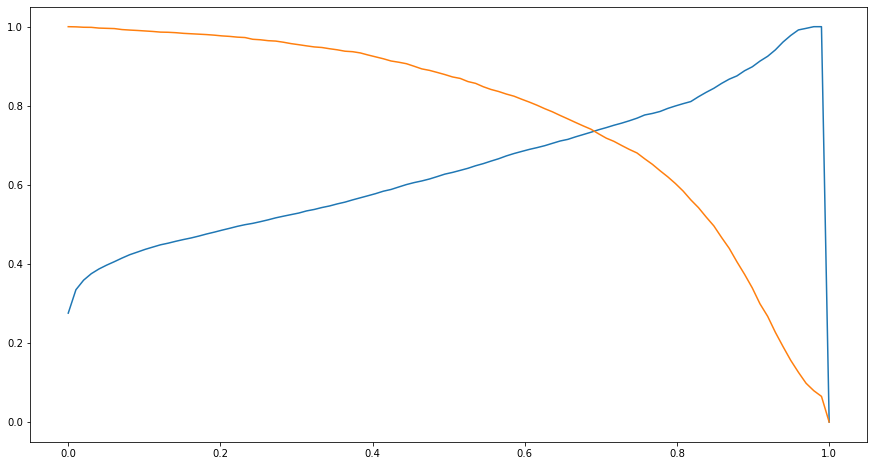

In [187]:
y_pred_proba_cat= cb.predict_proba(pool_testu)[:,1]
y_pred_proba_cat

from sklearn.metrics import precision_score, recall_score
thresholds = np.linspace(0, 1, 100)
precision_scores = []
recall_scores = []
for threshold in thresholds:
    adjusted_predictions = [1 if p > threshold else 0 for p in y_pred_proba_cat]
    precision_scores.append(precision_score(y_testt, adjusted_predictions))
    recall_scores.append(recall_score(y_testt, adjusted_predictions))
plt.figure(figsize=(15,8))

plt.plot(thresholds, precision_scores, label="precision")
plt.plot(thresholds, recall_scores, label="recall")
plt.show()

# For model with good recall and decent accuracy 

Giving importence to  FN 

In [ ]:
#FROM THE GRAPH TAKING THRESHOLD AS 0.44 FOR BEST RECALL

In [112]:
p_pred_nw1=[1 if p > 0.44 else 0 for p in y_pred_proba_cat]

print("Accuracy score::- \n",accuracy_score(y_testt,p_pred_nw1))
print()
print("AUC SCORE::- \n",roc_auc_score(y_testt,p_pred_nw1))
print()
print('Kappa score : \n',cohen_kappa_score(y_testt,p_pred_nw1))
print()
print()
print('TRAIN REPORT')
print(classification_report(y_reu, y_pred_train))  
print()
print('TEST REPORT')
print("Classification Report \n",classification_report(y_testt,p_pred_nw1))

Accuracy score::- 
 0.8063739539149375

AUC SCORE::- 
 0.8378765730600463

Kappa score : 
 0.5821381837909407


TRAIN REPORT
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     19203
           1       0.84      0.91      0.87     19203

    accuracy                           0.86     38406
   macro avg       0.87      0.86      0.86     38406
weighted avg       0.87      0.86      0.86     38406


TEST REPORT
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.77      0.85     12640
           1       0.60      0.91      0.72      4806

    accuracy                           0.81     17446
   macro avg       0.78      0.84      0.79     17446
weighted avg       0.86      0.81      0.82     17446



In [ ]:
#SHAP

SHAP (SHapley Additive exPlanations) is a game-theoretic approach to explain the output of any machine learning model.
SHAP helps us interpret machine learning models with Shapely values.
But what are Shapely values? Put simply, they are measures of contributions each predictor (feature) has in a machine learning model. 

In [138]:
!pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [109]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb)
shap_values = explainer.shap_values(df_set)

 With SHAP, we can generate explanations for a single prediction. The SHAP plot shows features that contribute to pushing the output from the base value (average model output) to the actual predicted value.
Red color indicates features that are pushing the prediction higher, and blue color indicates just the opposite.

In [110]:
shap.force_plot(explainer.expected_value, shap_values[10, :], df_set.iloc[10, :])

In [ ]:
lead time,customer type,parking spaces,no.of spcl requests,agent,country attributes pushed this instance towards
the cancellation of booking..

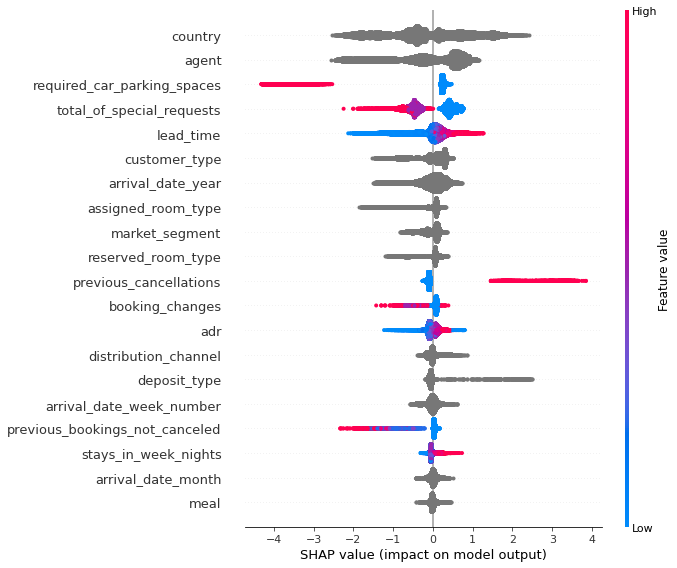

In [111]:
shap.summary_plot(shap_values, df_set)

We can visualize the importance of the features and their impact on the prediction by plotting summary charts.
The one below sorts features by the sum of SHAP value magnitudes over all samples.
It also uses SHAP values to show the distribution of the impacts each feature has.
The color represents the feature value — red indicating high and blue indicating low.

The y-axis indicates the variable name, in order of importance from top to bottom. 

On the x-axis is the SHAP value.

Gradient color indicates the original value for that variable. In booleans, it will take two colors, but in number it can contain the whole spectrum.

Each point represents a row from the original dataset.

# IMPORTENCE FOR BOTH PRECISION AND RECALL (FN AND FP)

In [ ]:
#FROM THE GRAPH TAKING THRESHOLD AS 0.7 FOR BEST  RECALL AND PRECISION

In [113]:
p_pred_nw2=[1 if p > 0.7 else 0 for p in y_pred_proba_cat]

print("Accuracy score::- \n",accuracy_score(y_testt,p_pred_nw2))
print()
print("AUC SCORE::- \n",roc_auc_score(y_testt,p_pred_nw2))
print()
print('Kappa score : \n',cohen_kappa_score(y_testt,p_pred_nw2))
print()
print()
print('TRAIN REPORT')
print(classification_report(y_reu, y_pred_train))  
print()
print('TEST REPORT')
print("Classification Report \n",classification_report(y_testt,p_pred_nw2))

Accuracy score::- 
 0.8544652069242233

AUC SCORE::- 
 0.814516203374474

Kappa score : 
 0.6330736235056902


TRAIN REPORT
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     19203
           1       0.84      0.91      0.87     19203

    accuracy                           0.86     38406
   macro avg       0.87      0.86      0.86     38406
weighted avg       0.87      0.86      0.86     38406


TEST REPORT
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     12640
           1       0.74      0.73      0.73      4806

    accuracy                           0.85     17446
   macro avg       0.82      0.81      0.82     17446
weighted avg       0.85      0.85      0.85     17446



# CATBOOST with feature selection

In [ ]:
#    If type == 'FeatureImportance'
#         See 'PredictionValuesChange' for non-ranking metrics and 'LossFunctionChange' for ranking metrics.

In [35]:
impft=cb.get_feature_importance(type = 'FeatureImportance')
impft

array([ 7.90172633,  0.4264613 ,  0.93416333,  0.25004399,  0.35862177,
        0.04179906,  4.6592315 ,  1.36963152,  1.73260179,  0.19857482,
        2.21306799, 17.28713194,  5.45243036,  0.43501565,  3.70093234,
        1.21397132,  1.62201197,  0.9910391 ,  0.72954072, 18.05878439,
        2.36508724,  1.90315131,  0.27572977,  2.01446274,  2.31967304,
        2.65892715, 15.87961024,  3.00657733])

In [39]:
imp_fts=pd.Series(impft,index=df_set.columns)
imp_fts.sort_values(ascending=False)

country                           18.058784
required_car_parking_spaces       17.287132
agent                             15.879610
lead_time                          7.901726
total_of_special_requests          5.452430
previous_cancellations             4.659232
arrival_date_year                  3.700932
customer_type                      3.006577
deposit_type                       2.658927
market_segment                     2.365087
assigned_room_type                 2.319673
adr                                2.213068
reserved_room_type                 2.014463
distribution_channel               1.903151
booking_changes                    1.732602
arrival_date_week_number           1.622012
previous_bookings_not_canceled     1.369632
arrival_date_month                 1.213971
arrival_date_day_of_month          0.991039
stays_in_week_nights               0.934163
meal                               0.729541
hotel                              0.435016
stays_in_weekend_nights         

In [40]:
imp_fts.sort_values(ascending=False).index

Index(['country', 'required_car_parking_spaces', 'agent', 'lead_time',
       'total_of_special_requests', 'previous_cancellations',
       'arrival_date_year', 'customer_type', 'deposit_type', 'market_segment',
       'assigned_room_type', 'adr', 'reserved_room_type',
       'distribution_channel', 'booking_changes', 'arrival_date_week_number',
       'previous_bookings_not_canceled', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'meal', 'hotel',
       'stays_in_weekend_nights', 'children', 'is_repeated_guest', 'adults',
       'days_in_waiting_list', 'babies'],
      dtype='object')

In [42]:
df_set_1=df_set[['country', 'required_car_parking_spaces', 'agent', 'lead_time',
       'total_of_special_requests', 'previous_cancellations',
       'arrival_date_year', 'customer_type', 'deposit_type', 'market_segment',
       'assigned_room_type', 'adr', 'reserved_room_type',
       'distribution_channel', 'booking_changes', 'arrival_date_week_number',
       'previous_bookings_not_canceled', 'arrival_date_month']]
df_set_1.select_dtypes(object).columns

Index(['country', 'agent', 'arrival_date_year', 'customer_type',
       'deposit_type', 'market_segment', 'assigned_room_type',
       'reserved_room_type', 'distribution_channel',
       'arrival_date_week_number', 'arrival_date_month'],
      dtype='object')

In [44]:
df_set_2=df_set[['country', 'required_car_parking_spaces', 'agent', 'lead_time',
       'total_of_special_requests', 'previous_cancellations',
       'arrival_date_year', 'customer_type', 'deposit_type', 'market_segment',
       'assigned_room_type', 'adr', 'reserved_room_type']]
df_set_2.select_dtypes(object).columns

Index(['country', 'agent', 'arrival_date_year', 'customer_type',
       'deposit_type', 'market_segment', 'assigned_room_type',
       'reserved_room_type'],
      dtype='object')

# Catboost with feature selection

In [96]:
from catboost import CatBoostClassifier,Pool

cb = CatBoostClassifier()

from sklearn.model_selection import train_test_split
X_trainn, X_testt, y_trainn, y_testt = train_test_split(df_set_2, Y, test_size=0.20, 
                                                    random_state=1)

from imblearn.under_sampling import RandomUnderSampler
rusu = RandomUnderSampler(random_state=42)
X_reu, y_reu = rusu.fit_resample(X_trainn, y_trainn)


pool_trainu = Pool(X_reu, y_reu,
                  cat_features =['country', 'agent', 'arrival_date_year', 'customer_type',
       'deposit_type', 'market_segment', 'assigned_room_type',
       'reserved_room_type'])

pool_testu = Pool(X_testt, cat_features =['country', 'agent', 'arrival_date_year', 'customer_type',
       'deposit_type', 'market_segment', 'assigned_room_type',
       'reserved_room_type'])

cb.fit(pool_trainu)
y_pred = cb.predict(pool_testu)




y_pred_train = cb.predict(pool_trainu)


print("Accuracy score::- \n",accuracy_score(y_testt,y_pred))
print()
print("AUC SCORE::- \n",roc_auc_score(y_testt,y_pred))
print()
print('Kappa score : \n',cohen_kappa_score(y_testt,y_pred))
print()
print()
print('TRAIN REPORT')
print(classification_report(y_reu, y_pred_train))  
print()
print('TEST REPORT')
print("Classification Report \n",classification_report(y_testt,y_pred))

Learning rate set to 0.048918
0:	learn: 0.6693279	total: 124ms	remaining: 2m 3s
1:	learn: 0.6447398	total: 263ms	remaining: 2m 11s
2:	learn: 0.6247637	total: 417ms	remaining: 2m 18s
3:	learn: 0.6061347	total: 601ms	remaining: 2m 29s
4:	learn: 0.5884819	total: 729ms	remaining: 2m 24s
5:	learn: 0.5735603	total: 871ms	remaining: 2m 24s
6:	learn: 0.5619555	total: 982ms	remaining: 2m 19s
7:	learn: 0.5490490	total: 1.11s	remaining: 2m 17s
8:	learn: 0.5392464	total: 1.24s	remaining: 2m 16s
9:	learn: 0.5292276	total: 1.36s	remaining: 2m 15s
10:	learn: 0.5203698	total: 1.47s	remaining: 2m 12s
11:	learn: 0.5127236	total: 1.58s	remaining: 2m 10s
12:	learn: 0.5069090	total: 1.7s	remaining: 2m 8s
13:	learn: 0.5005819	total: 1.79s	remaining: 2m 6s
14:	learn: 0.4956460	total: 1.92s	remaining: 2m 6s
15:	learn: 0.4916992	total: 2.04s	remaining: 2m 5s
16:	learn: 0.4869665	total: 2.14s	remaining: 2m 3s
17:	learn: 0.4830346	total: 2.24s	remaining: 2m 2s
18:	learn: 0.4789757	total: 2.35s	remaining: 2m 1s
1

157:	learn: 0.3802361	total: 18.9s	remaining: 1m 40s
158:	learn: 0.3801114	total: 19s	remaining: 1m 40s
159:	learn: 0.3799611	total: 19.1s	remaining: 1m 40s
160:	learn: 0.3798898	total: 19.2s	remaining: 1m 40s
161:	learn: 0.3797309	total: 19.3s	remaining: 1m 40s
162:	learn: 0.3794310	total: 19.5s	remaining: 1m 40s
163:	learn: 0.3792356	total: 19.6s	remaining: 1m 39s
164:	learn: 0.3792292	total: 19.6s	remaining: 1m 39s
165:	learn: 0.3791415	total: 19.8s	remaining: 1m 39s
166:	learn: 0.3789767	total: 19.9s	remaining: 1m 39s
167:	learn: 0.3788332	total: 20s	remaining: 1m 39s
168:	learn: 0.3786915	total: 20.1s	remaining: 1m 38s
169:	learn: 0.3786180	total: 20.2s	remaining: 1m 38s
170:	learn: 0.3785053	total: 20.3s	remaining: 1m 38s
171:	learn: 0.3784743	total: 20.4s	remaining: 1m 38s
172:	learn: 0.3783251	total: 20.5s	remaining: 1m 38s
173:	learn: 0.3781970	total: 20.7s	remaining: 1m 38s
174:	learn: 0.3781680	total: 20.7s	remaining: 1m 37s
175:	learn: 0.3780983	total: 20.9s	remaining: 1m 3

313:	learn: 0.3658221	total: 38s	remaining: 1m 23s
314:	learn: 0.3657186	total: 38.2s	remaining: 1m 22s
315:	learn: 0.3657039	total: 38.3s	remaining: 1m 22s
316:	learn: 0.3656558	total: 38.4s	remaining: 1m 22s
317:	learn: 0.3656382	total: 38.6s	remaining: 1m 22s
318:	learn: 0.3656007	total: 39.1s	remaining: 1m 23s
319:	learn: 0.3655473	total: 39.4s	remaining: 1m 23s
320:	learn: 0.3654169	total: 39.6s	remaining: 1m 23s
321:	learn: 0.3653361	total: 39.8s	remaining: 1m 23s
322:	learn: 0.3652911	total: 39.9s	remaining: 1m 23s
323:	learn: 0.3652435	total: 40.1s	remaining: 1m 23s
324:	learn: 0.3652018	total: 40.3s	remaining: 1m 23s
325:	learn: 0.3651543	total: 40.4s	remaining: 1m 23s
326:	learn: 0.3650861	total: 40.6s	remaining: 1m 23s
327:	learn: 0.3649916	total: 40.7s	remaining: 1m 23s
328:	learn: 0.3649003	total: 40.9s	remaining: 1m 23s
329:	learn: 0.3648765	total: 41s	remaining: 1m 23s
330:	learn: 0.3648034	total: 41.1s	remaining: 1m 23s
331:	learn: 0.3647239	total: 41.3s	remaining: 1m 2

469:	learn: 0.3574648	total: 1m 1s	remaining: 1m 9s
470:	learn: 0.3573482	total: 1m 1s	remaining: 1m 9s
471:	learn: 0.3573090	total: 1m 1s	remaining: 1m 8s
472:	learn: 0.3572793	total: 1m 1s	remaining: 1m 8s
473:	learn: 0.3572444	total: 1m 1s	remaining: 1m 8s
474:	learn: 0.3572351	total: 1m 2s	remaining: 1m 8s
475:	learn: 0.3572054	total: 1m 2s	remaining: 1m 8s
476:	learn: 0.3571280	total: 1m 2s	remaining: 1m 8s
477:	learn: 0.3571050	total: 1m 2s	remaining: 1m 8s
478:	learn: 0.3570437	total: 1m 2s	remaining: 1m 8s
479:	learn: 0.3569809	total: 1m 2s	remaining: 1m 8s
480:	learn: 0.3569327	total: 1m 2s	remaining: 1m 7s
481:	learn: 0.3569126	total: 1m 3s	remaining: 1m 7s
482:	learn: 0.3568744	total: 1m 3s	remaining: 1m 7s
483:	learn: 0.3568705	total: 1m 3s	remaining: 1m 7s
484:	learn: 0.3568320	total: 1m 3s	remaining: 1m 7s
485:	learn: 0.3567862	total: 1m 3s	remaining: 1m 7s
486:	learn: 0.3567678	total: 1m 3s	remaining: 1m 7s
487:	learn: 0.3567520	total: 1m 3s	remaining: 1m 7s
488:	learn: 

626:	learn: 0.3516055	total: 1m 21s	remaining: 48.6s
627:	learn: 0.3515824	total: 1m 21s	remaining: 48.5s
628:	learn: 0.3515721	total: 1m 21s	remaining: 48.4s
629:	learn: 0.3514732	total: 1m 22s	remaining: 48.2s
630:	learn: 0.3514227	total: 1m 22s	remaining: 48.1s
631:	learn: 0.3513884	total: 1m 22s	remaining: 47.9s
632:	learn: 0.3513284	total: 1m 22s	remaining: 47.8s
633:	learn: 0.3513120	total: 1m 22s	remaining: 47.7s
634:	learn: 0.3512427	total: 1m 22s	remaining: 47.5s
635:	learn: 0.3512235	total: 1m 22s	remaining: 47.4s
636:	learn: 0.3512068	total: 1m 22s	remaining: 47.3s
637:	learn: 0.3511780	total: 1m 23s	remaining: 47.2s
638:	learn: 0.3511496	total: 1m 23s	remaining: 47s
639:	learn: 0.3511257	total: 1m 23s	remaining: 46.9s
640:	learn: 0.3510609	total: 1m 23s	remaining: 46.8s
641:	learn: 0.3510443	total: 1m 23s	remaining: 46.7s
642:	learn: 0.3510132	total: 1m 23s	remaining: 46.6s
643:	learn: 0.3509589	total: 1m 24s	remaining: 46.4s
644:	learn: 0.3509549	total: 1m 24s	remaining: 4

783:	learn: 0.3465439	total: 1m 40s	remaining: 27.8s
784:	learn: 0.3465109	total: 1m 40s	remaining: 27.6s
785:	learn: 0.3465022	total: 1m 40s	remaining: 27.5s
786:	learn: 0.3464806	total: 1m 41s	remaining: 27.4s
787:	learn: 0.3464256	total: 1m 41s	remaining: 27.2s
788:	learn: 0.3463570	total: 1m 41s	remaining: 27.1s
789:	learn: 0.3463482	total: 1m 41s	remaining: 27s
790:	learn: 0.3463414	total: 1m 41s	remaining: 26.8s
791:	learn: 0.3463255	total: 1m 41s	remaining: 26.7s
792:	learn: 0.3463169	total: 1m 41s	remaining: 26.6s
793:	learn: 0.3462861	total: 1m 41s	remaining: 26.4s
794:	learn: 0.3462423	total: 1m 42s	remaining: 26.3s
795:	learn: 0.3462236	total: 1m 42s	remaining: 26.2s
796:	learn: 0.3461976	total: 1m 42s	remaining: 26s
797:	learn: 0.3461823	total: 1m 42s	remaining: 25.9s
798:	learn: 0.3461378	total: 1m 42s	remaining: 25.8s
799:	learn: 0.3461325	total: 1m 42s	remaining: 25.6s
800:	learn: 0.3461133	total: 1m 42s	remaining: 25.5s
801:	learn: 0.3460749	total: 1m 42s	remaining: 25.

940:	learn: 0.3421368	total: 1m 59s	remaining: 7.49s
941:	learn: 0.3420929	total: 1m 59s	remaining: 7.36s
942:	learn: 0.3420444	total: 1m 59s	remaining: 7.24s
943:	learn: 0.3419852	total: 1m 59s	remaining: 7.11s
944:	learn: 0.3419342	total: 2m	remaining: 6.99s
945:	learn: 0.3419296	total: 2m	remaining: 6.86s
946:	learn: 0.3418910	total: 2m	remaining: 6.73s
947:	learn: 0.3418457	total: 2m	remaining: 6.61s
948:	learn: 0.3418371	total: 2m	remaining: 6.48s
949:	learn: 0.3418136	total: 2m	remaining: 6.36s
950:	learn: 0.3417731	total: 2m	remaining: 6.23s
951:	learn: 0.3417520	total: 2m 1s	remaining: 6.1s
952:	learn: 0.3417439	total: 2m 1s	remaining: 5.98s
953:	learn: 0.3416530	total: 2m 1s	remaining: 5.85s
954:	learn: 0.3416463	total: 2m 1s	remaining: 5.72s
955:	learn: 0.3416401	total: 2m 1s	remaining: 5.59s
956:	learn: 0.3416123	total: 2m 1s	remaining: 5.47s
957:	learn: 0.3415908	total: 2m 1s	remaining: 5.34s
958:	learn: 0.3415730	total: 2m 1s	remaining: 5.21s
959:	learn: 0.3415258	total: 2

In [ ]:
#WE ARE GETTING BEST MODEL IN CATBOOST WITH UNDERSAMPLING AND WITHOUT FEATURE SELECTION